## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

 

In [1353]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing warnings to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [1354]:
#importing the input data into a datafrome
housing = pd.read_csv(r"C:\Users\sivaskandan\Desktop\STUDY NOTES\UPGRAD AI AND ML\ridge and lasso\Assignment\train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1355]:
#Analysing the dataset
print('--------------info------------------------------------')
print(housing.info())
print('--------------Shape-----------------------------------')
print(housing.shape)
print('--------------check for null values ------------------')
#Analysing the columns with null
print(housing.isnull().sum()[housing.isnull().sum()>0])
print('Numbeer of columns having null values : {}'.format(housing.isnull().sum()[housing.isnull().sum()>0].shape[0]))

--------------info------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 1

## We have 19 columns with null values.


In [1356]:
#The column LotFrontage has 259 null values. If we remove the data we will be losing 17 percent of the data. Seeing if we can impute data with any other value
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

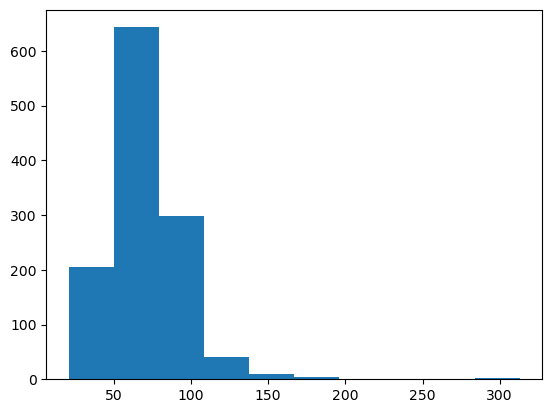

In [1357]:
#Analysing the distribution of LotFrontage before imputing null values with median 
plt.hist(housing.LotFrontage)

(array([205., 902., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

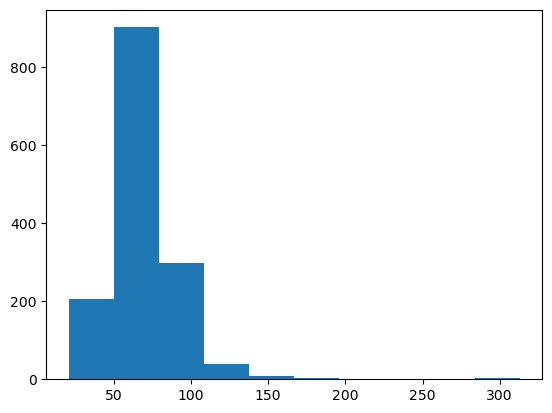

In [1358]:
#The mean and median are almost similar. We impute median with null values
housing.LotFrontage.fillna(value = housing.LotFrontage.median(),inplace = True)
#Analysing the distribution of LotFrontage before imputing null values with median 
plt.hist(housing.LotFrontage)

In [1359]:
#Analuysing the columns with high values as null
round(100*housing.isnull().sum()[(housing.isnull().sum()>0)]/len(housing), 2)

Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

# The columns Alley,MiscFeature, PoolQC and Fence has above 80 percent null values from data dictionary that null value represents the absence of that feature.
# Since these features is having more that 80% has same value it can be dropped

In [1360]:
#the above 4 columns can be dropped because more than 80 % of the data is having value has not having the feature from data dictionary
housing = housing.drop(columns = ['Alley', 'PoolQC','Fence','MiscFeature'])

In [1361]:
# All the rows with more than 90% of the data as same values can be deleted. 
columnList = []   
for col in (housing):
    if(housing[col].value_counts().max() >=  housing.shape[0]*0.9 ):
        columnList.append(col)


# Droping the columns with more than 90% same value
print(columnList)
housing.drop(columnList, axis = 1, inplace = True)

housing.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... GarageArea GarageQual  WoodDeckSF  \
0    Inside      CollgCr       Norm  ...        548         TA           0   
1       FR2      Veenker      Feedr  ...        460         TA         298   
2    Inside      CollgCr       Norm  ...        608         TA           0   
3    Corner      Crawfor       Norm  ...        642         TA           0   
4       FR2      NoRidge       Norm  ...        836         TA         192   

   OpenPorchSF  EnclosedPorch  MoSold YrSold SaleType SaleCondition SalePrice  
0           61              0       2   2008       WD        Normal    208500  
1            0              0       5   2007       WD        Normal    181500  
2           42              0       9   2008       WD        Normal    223500  
3           35            272       2   2006       WD       Abnorml    140000  
4           84              0      12   2008       WD        Normal    250000  

[5 rows x 59 columns]

In [1362]:
#Now checking for basement related columns
Basement_columns = ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']
Basement_housing = housing.loc[(housing['BsmtExposure'].isna()) | (housing['BsmtFinType2'].isna()),Basement_columns]
print(Basement_housing)
print(Basement_housing.shape)

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17        NaN      NaN          NaN          NaN          NaN
39        NaN      NaN          NaN          NaN          NaN
90        NaN      NaN          NaN          NaN          NaN
102       NaN      NaN          NaN          NaN          NaN
156       NaN      NaN          NaN          NaN          NaN
182       NaN      NaN          NaN          NaN          NaN
259       NaN      NaN          NaN          NaN          NaN
332        Gd       TA           No          GLQ          NaN
342       NaN      NaN          NaN          NaN          NaN
362       NaN      NaN          NaN          NaN          NaN
371       NaN      NaN          NaN          NaN          NaN
392       NaN      NaN          NaN          NaN          NaN
520       NaN      NaN          NaN          NaN          NaN
532       NaN      NaN          NaN          NaN          NaN
533       NaN      NaN          NaN          NaN          NaN
553     

In [1363]:
# Execept the two rows other rows having NA are from data dictionary we could see it is due to absence of basement
#Adding the values for these columns as Nobase when all these fields as null
housing.loc[(housing['BsmtExposure'].isna()) | (housing['BsmtFinType2'].isna()) | (housing['BsmtFinType1'].isna()) | (housing['BsmtCond'].isna()) | (housing['BsmtQual'].isna()),Basement_columns] = housing.loc[(housing['BsmtExposure'].isna()) | (housing['BsmtFinType2'].isna()) | (housing['BsmtFinType1'].isna()) | (housing['BsmtCond'].isna()) | (housing['BsmtQual'].isna()),Basement_columns].fillna('Nobase')
Basement_columns = ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']
filtered_housing = housing.loc[(housing['BsmtExposure'].isna()) | (housing['BsmtFinType2'].isna()) | (housing['BsmtFinType1'].isna()) | (housing['BsmtCond'].isna()) | (housing['BsmtQual'].isna()),Basement_columns]
print(filtered_housing)
print(filtered_housing.shape)

Empty DataFrame
Columns: [BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2]
Index: []
(0, 5)


In [1364]:
for i in Basement_columns :
    print(i)
    print(housing[i].value_counts())

BsmtQual
TA        649
Gd        618
Ex        121
Nobase     37
Fa         35
Name: BsmtQual, dtype: int64
BsmtCond
TA        1311
Gd          65
Fa          45
Nobase      37
Po           2
Name: BsmtCond, dtype: int64
BsmtExposure
No        953
Av        221
Gd        134
Mn        114
Nobase     38
Name: BsmtExposure, dtype: int64
BsmtFinType1
Unf       430
GLQ       418
ALQ       220
BLQ       148
Rec       133
LwQ        74
Nobase     37
Name: BsmtFinType1, dtype: int64
BsmtFinType2
Unf       1256
Rec         54
LwQ         46
Nobase      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64


In [1365]:
print('--------------check for null values ------------------')
#Analysing the columns with null
print(housing.isnull().sum()[housing.isnull().sum()>0])
print('Numbeer of columns having null values : {}'.format(housing.isnull().sum()[housing.isnull().sum()>0].shape[0]))

--------------check for null values ------------------
MasVnrType        8
MasVnrArea        8
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
dtype: int64
Numbeer of columns having null values : 7


In [1366]:
Garage_columns = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
#From data dictionary the value of null FireplaceQu indicates no garage so replacing null with 'NoGarage'
housing['GarageType'] = housing['GarageType'].apply(lambda x : 'NoGarage' if pd.isna(x) else x)
housing['GarageFinish'] = housing['GarageFinish'].apply(lambda x : 'No' if pd.isna(x) else x)
housing['GarageQual'] = housing['GarageQual'].apply(lambda x : 'No' if pd.isna(x) else x)
#housing['GarageCond'] = housing['GarageCond'].apply(lambda x : 'No' if pd.isna(x) else x)

In [1367]:
#when filtering the records where we have no garage we could see the garageyrblt is null since house as no garage. So we can replace it with some  different value like -1
housing['GarageYrBlt'] = housing['GarageYrBlt'].apply(lambda x : -1 if pd.isna(x) else x)

In [1368]:
#Analysing MasvnrType variable
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1369]:
#since we only have 8 rows droping these rows
housing = housing.loc[~housing.MasVnrType.isna()]


In [1370]:
#Analysing FireplaceQu variable
housing['FireplaceQu'].value_counts()

Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1371]:
#From data dictionary the value of null FireplaceQu indicates no fire place so replacing null with 'No'
housing['FireplaceQu'] = housing['FireplaceQu'].apply(lambda x : 'No' if pd.isna(x) else x)
housing['FireplaceQu'].value_counts()

No    686
Gd    378
TA    311
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1372]:
print('--------------check for null values ------------------')
#Analysing the columns with null
print(housing.isnull().sum()[housing.isnull().sum()>0])
print('Numbeer of columns having null values : {}'.format(housing.isnull().sum()[housing.isnull().sum()>0].shape[0]))

--------------check for null values ------------------
Series([], dtype: int64)
Numbeer of columns having null values : 0


In [1373]:
#Dropping ID column as it doesnt hold any significance
housing = housing.drop(columns = 'Id')

In [1374]:
# Columns now available in housing dataset
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [1375]:
# housing size
housing.shape

(1452, 58)

In [1376]:
# Defining numerical and categorical variables
#noting the categorical and numerical variables from data dictionary
categorical = ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig',
              'Neighborhood','Condition1','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
              'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','FireplaceQu','GarageType','GarageFinish','GarageQual',
               'SaleType','SaleCondition','YearRemodAdd','BedroomAbvGr']
        
    

numerical = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
              'KitchenQual','TotRmsAbvGrd','WoodDeckSF','OpenPorchSF','EnclosedPorch','MoSold','YrSold','BsmtFinSF2','SalePrice']

In [1377]:
housing[categorical]

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood  \
0             60       RL      Reg         Lvl    Inside      CollgCr   
1             20       RL      Reg         Lvl       FR2      Veenker   
2             60       RL      IR1         Lvl    Inside      CollgCr   
3             70       RL      IR1         Lvl    Corner      Crawfor   
4             60       RL      IR1         Lvl       FR2      NoRidge   
...          ...      ...      ...         ...       ...          ...   
1455          60       RL      Reg         Lvl    Inside      Gilbert   
1456          20       RL      Reg         Lvl    Inside       NWAmes   
1457          70       RL      Reg         Lvl    Inside      Crawfor   
1458          20       RL      Reg         Lvl    Inside        NAmes   
1459          20       RL      Reg         Lvl    Inside      Edwards   

     Condition1 BldgType HouseStyle  OverallQual  ...  BsmtFinType2  \
0          Norm     1Fam     2Story            7  ...           Unf   
1         Feedr     1Fam     1Story            6  ...           Unf   
2          Norm     1Fam     2Story            7  ...           Unf   
3          Norm     1Fam     2Story            7  ...           Unf   
4          Norm     1Fam     2Story            8  ...           Unf   
...         ...      ...        ...          ...  ...           ...   
1455       Norm     1Fam     2Story            6  ...           Unf   
1456       Norm     1Fam     1Story            6  ...           Rec   
1457       Norm     1Fam     2Story            7  ...           Unf   
1458       Norm     1Fam     1Story            5  ...           Rec   
1459       Norm     1Fam     1Story            5  ...           LwQ   

      HeatingQC FireplaceQu GarageType GarageFinish GarageQual SaleType  \
0            Ex          No     Attchd          RFn         TA       WD   
1            Ex          TA     Attchd          RFn         TA       WD   
2            Ex          TA     Attchd          RFn         TA       WD   
3            Gd          Gd     Detchd          Unf         TA       WD   
4            Ex          TA     Attchd          RFn         TA       WD   
...         ...         ...        ...          ...        ...      ...   
1455         Ex          TA     Attchd          RFn         TA       WD   
1456         TA          TA     Attchd          Unf         TA       WD   
1457         Ex          Gd     Attchd          RFn         TA       WD   
1458         Gd          No     Attchd          Unf         TA       WD   
1459         Gd          No     Attchd          Fin         TA       WD   

     SaleCondition YearRemodAdd BedroomAbvGr  
0           Normal         2003            3  
1           Normal         1976            3  
2           Normal         2002            3  
3          Abnorml         1970            3  
4           Normal         2000            4  
...            ...          ...          ...  
1455        Normal         2000            3  
1456        Normal         1988            3  
1457        Normal         2006            4  
1458        Normal         1996            2  
1459        Normal         1965            3  

[1452 rows x 33 columns]

In [1378]:
len(categorical)+len(numerical)


58

# Univariate analysis

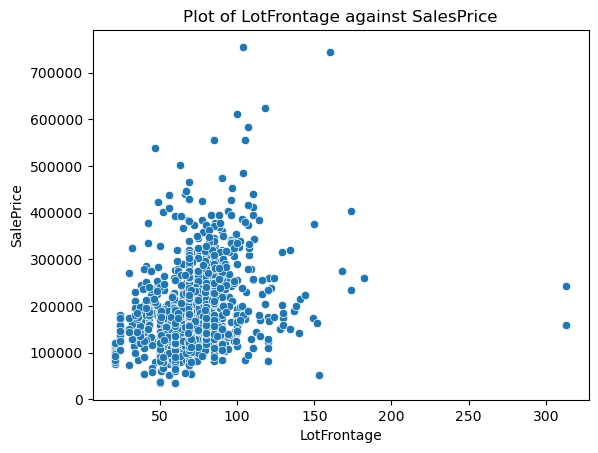

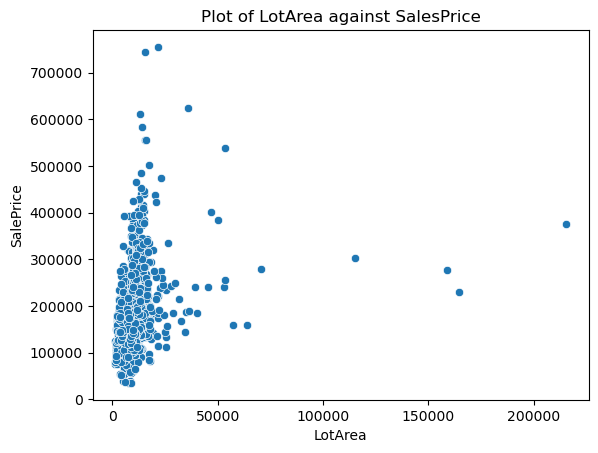

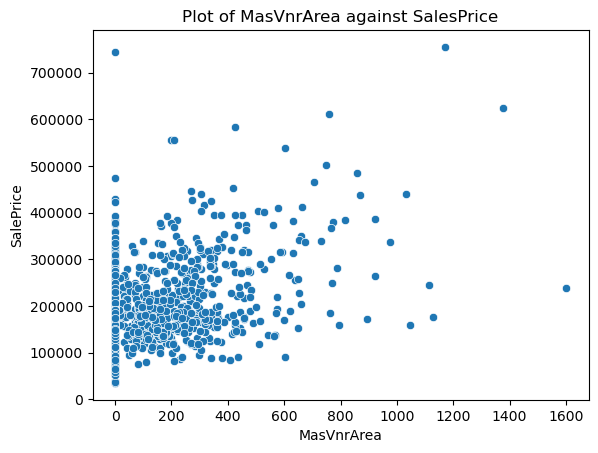

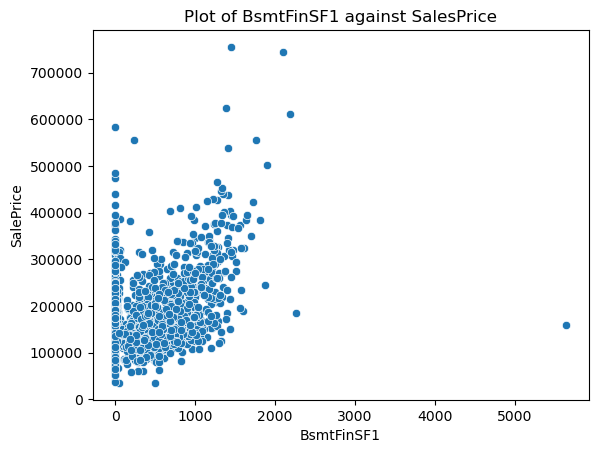

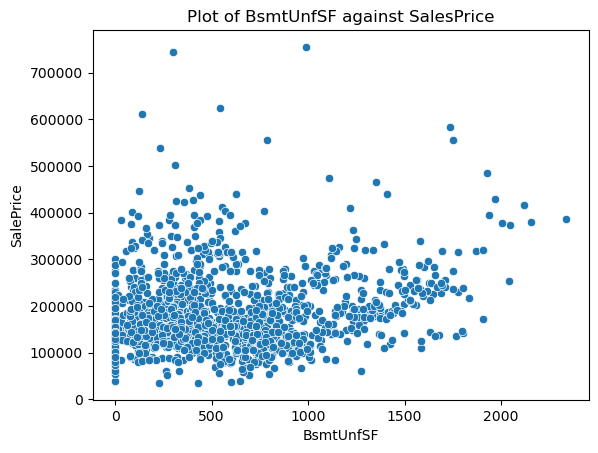

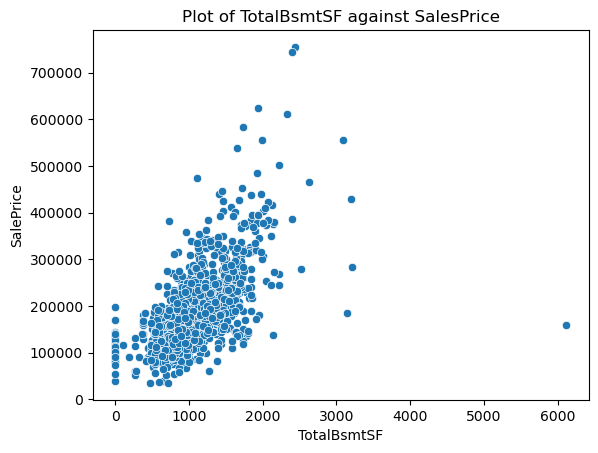

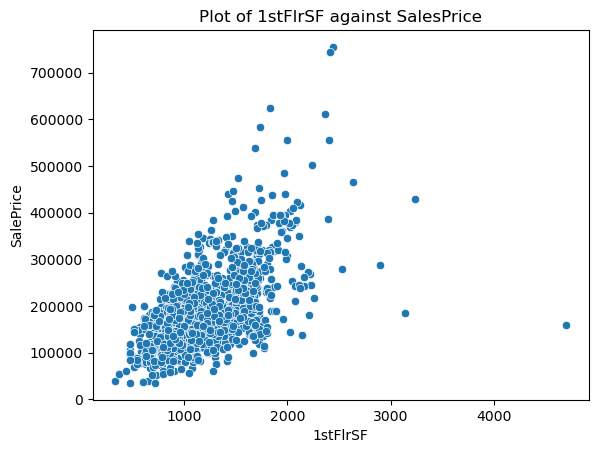

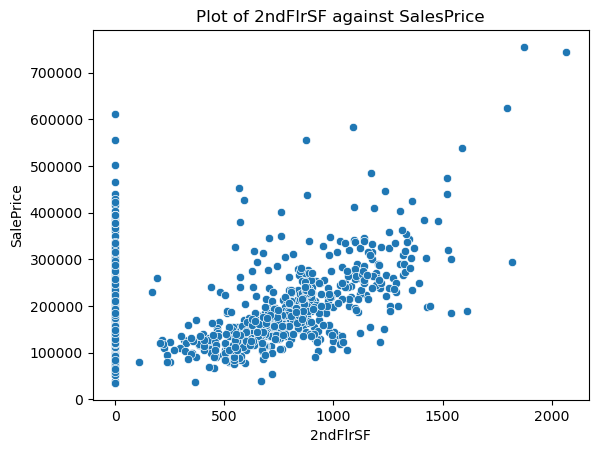

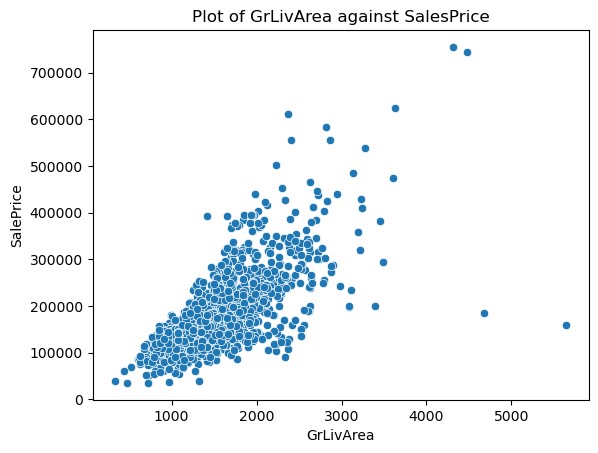

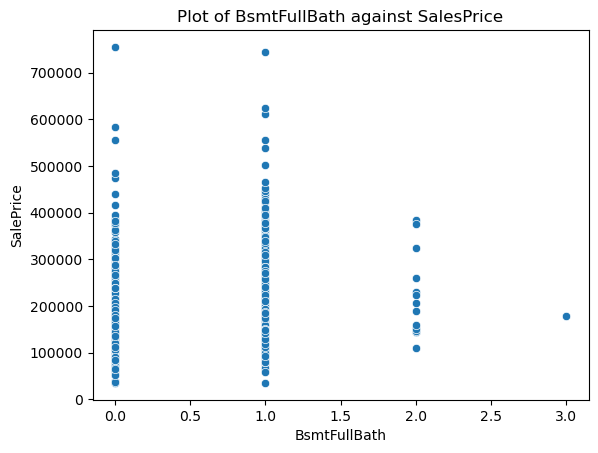

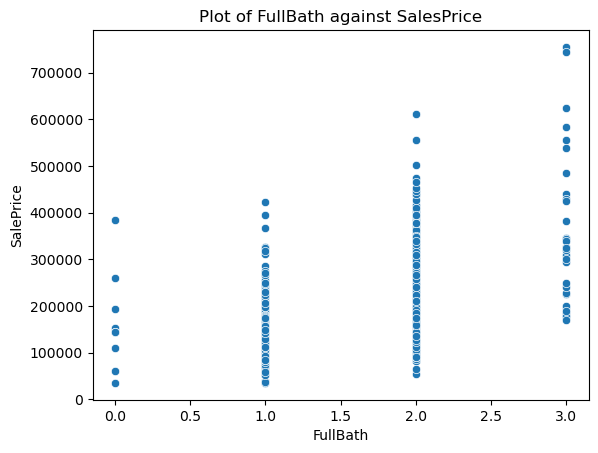

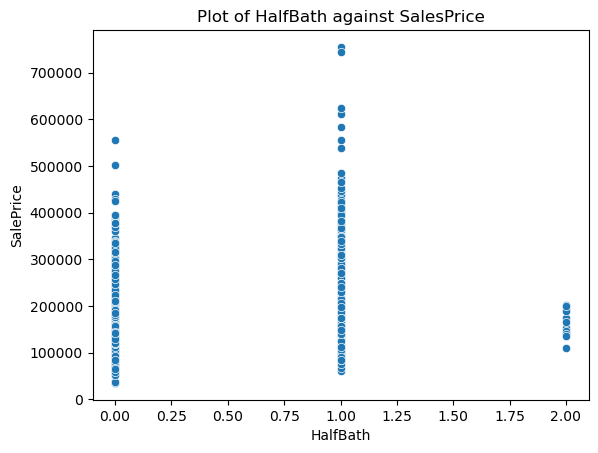

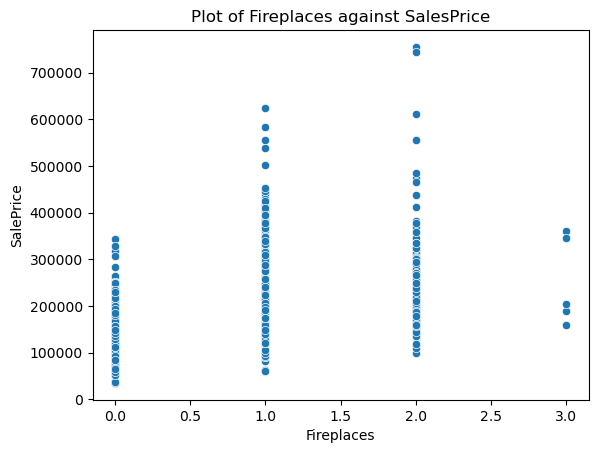

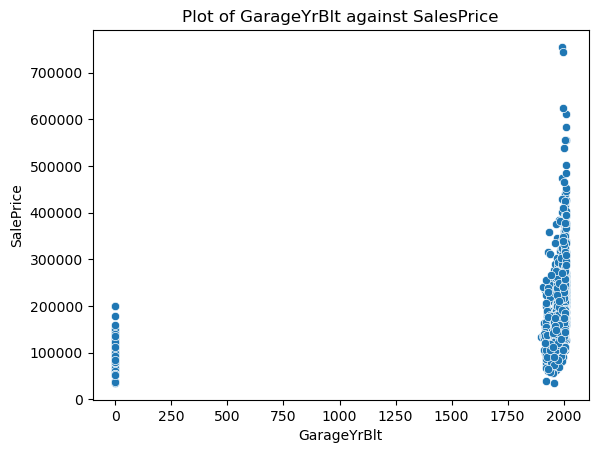

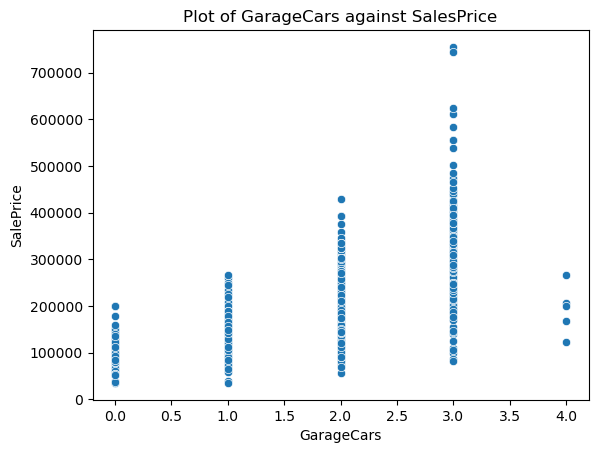

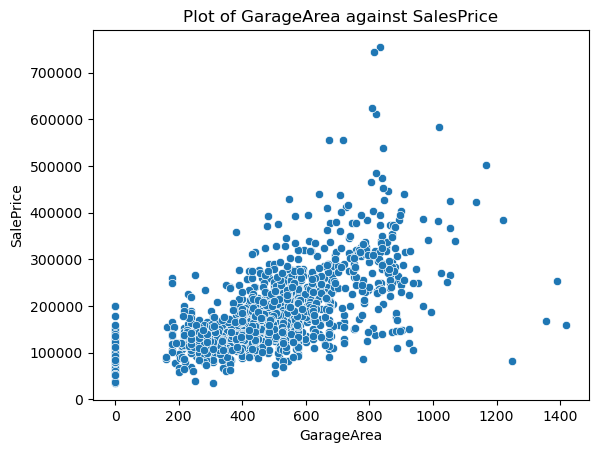

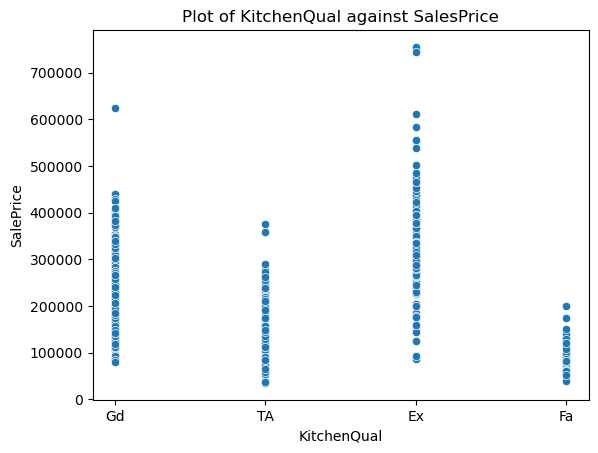

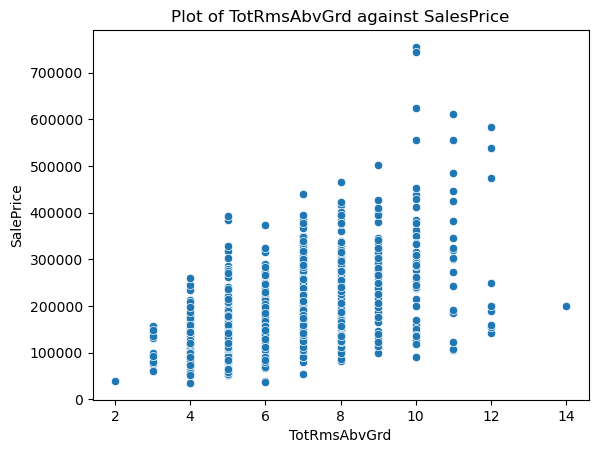

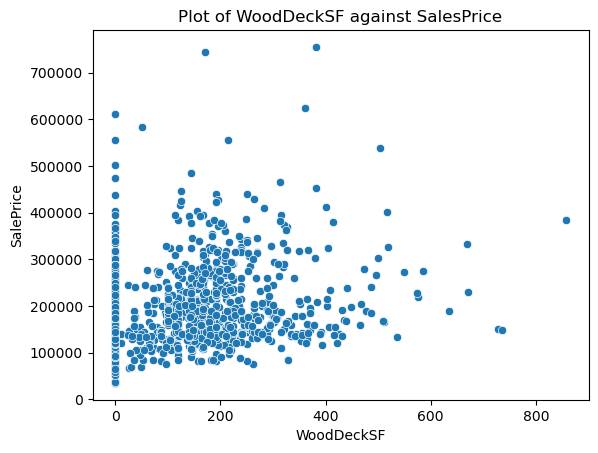

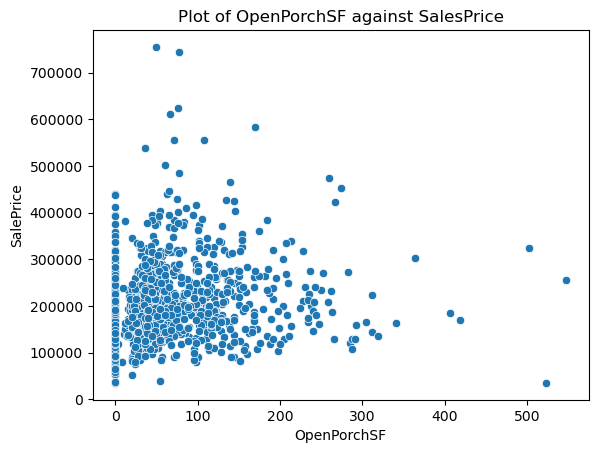

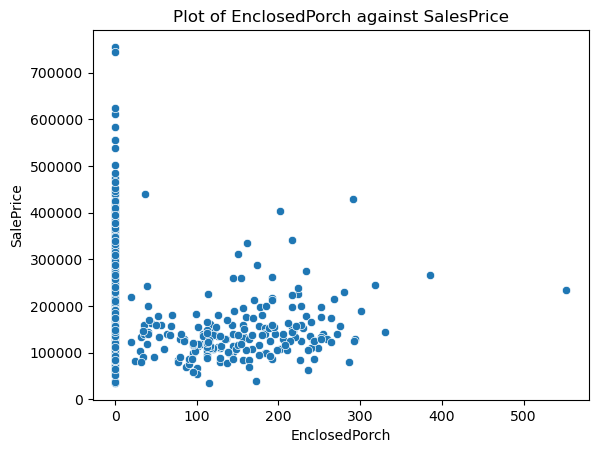

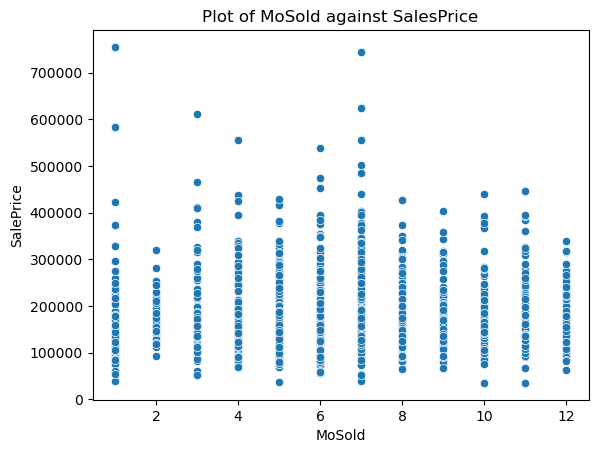

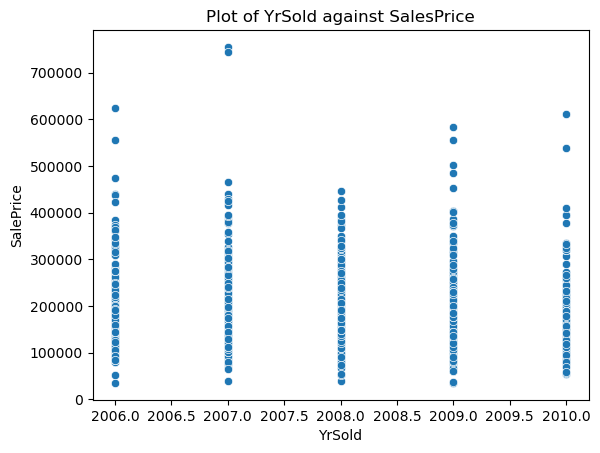

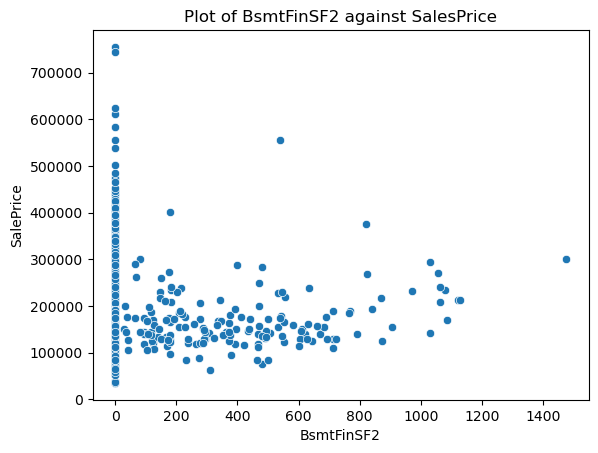

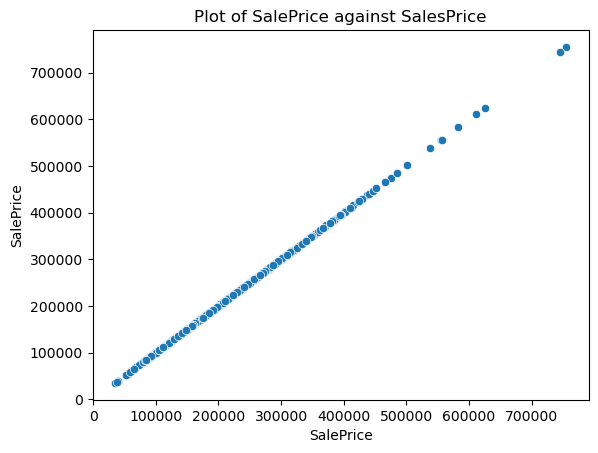

In [1379]:
#Plotting scatter plots of numerical variables
#plt.figure(figsize=(3,4))
for i,columns in enumerate(numerical):
#plt.subplot(len(numerical)-1,1,i+1) 
    sns.scatterplot(x=columns, y='SalePrice', data=housing)
    plt.title("Plot of {} against SalesPrice".format(columns))
    plt.show()

# There is a linear relationship between saleprice and 1stFlrSf
# There is a linear relationship between saleprice and 2ndFlrsf
# There is a linear relationship between saleprice and GrLivArea
# There is a linear relationship between saleprice and GarageArea

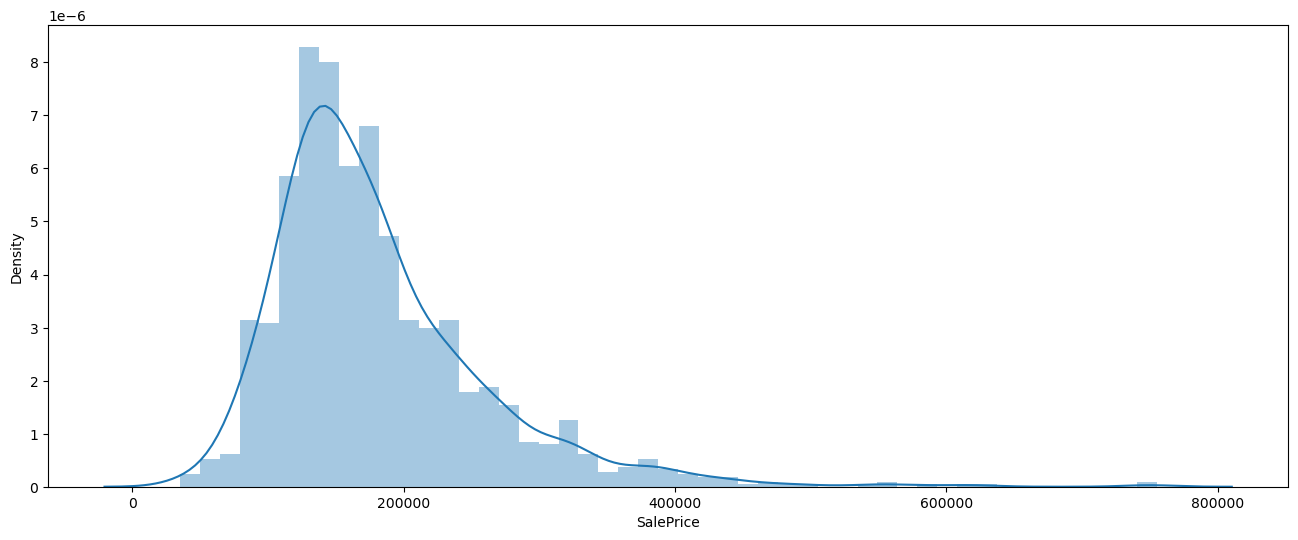

In [1380]:
#lets plot the distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

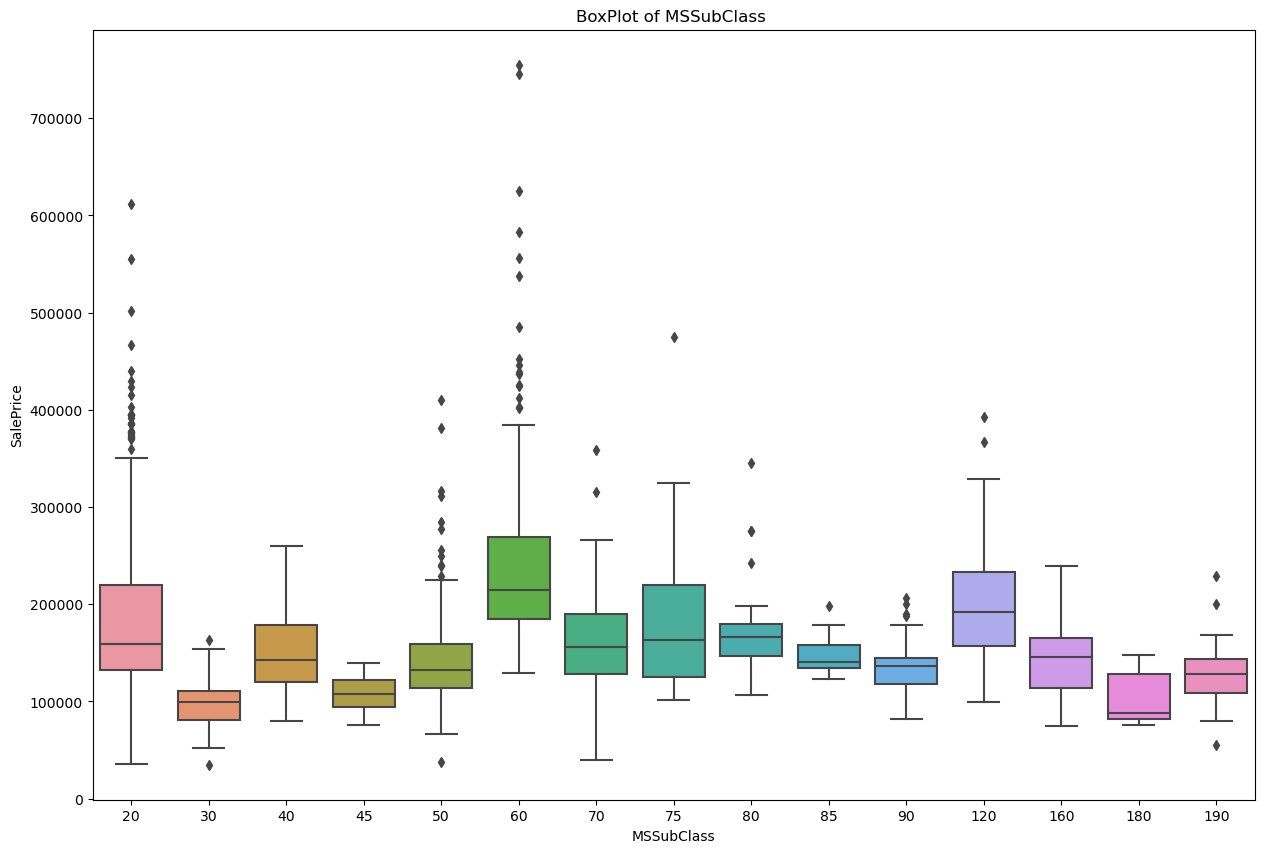

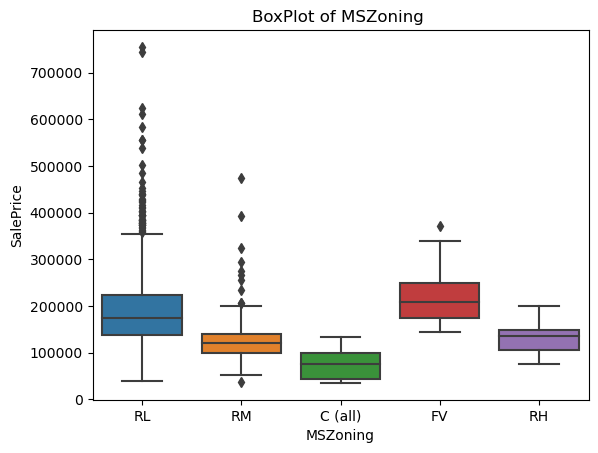

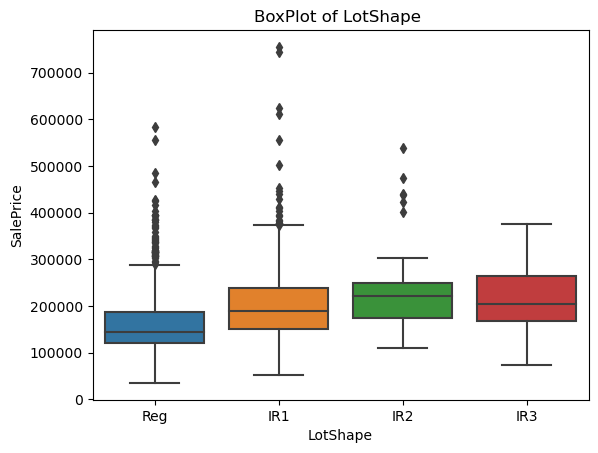

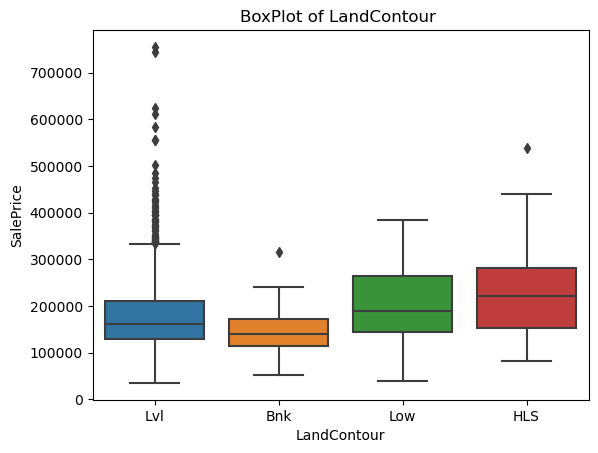

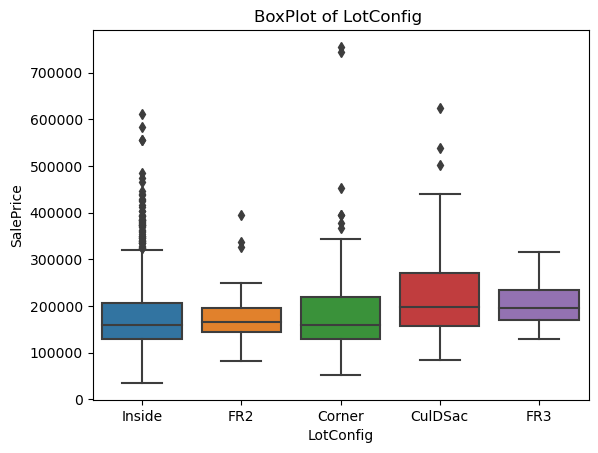

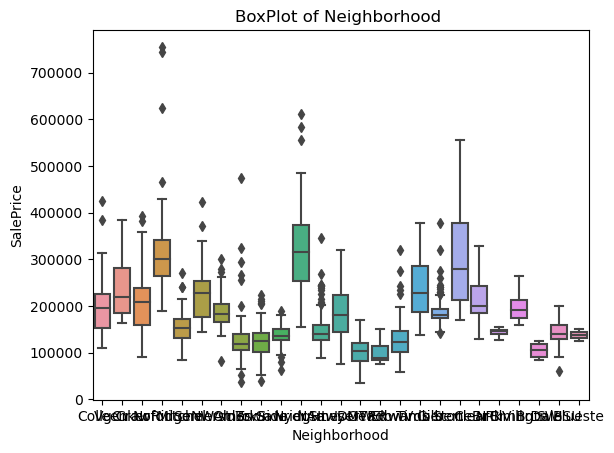

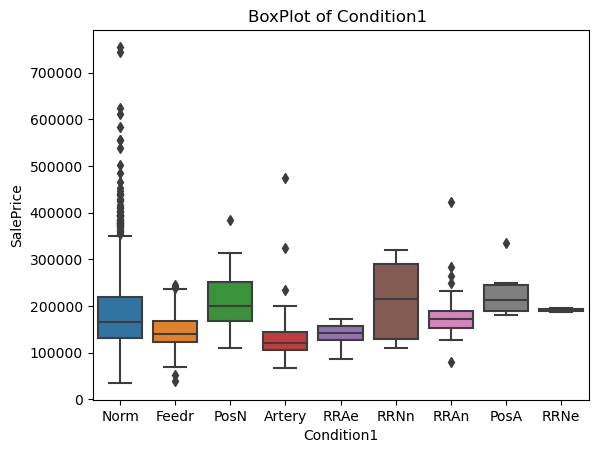

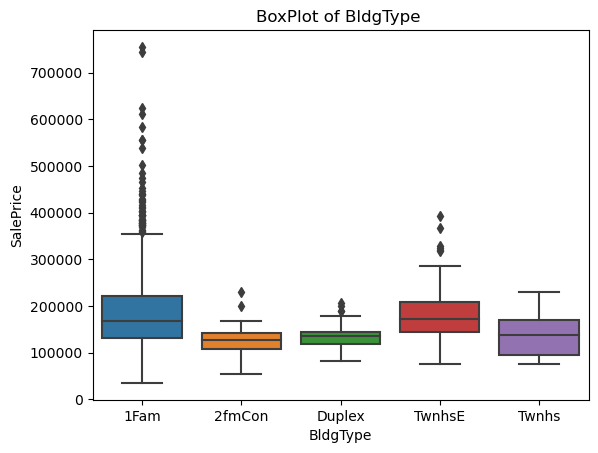

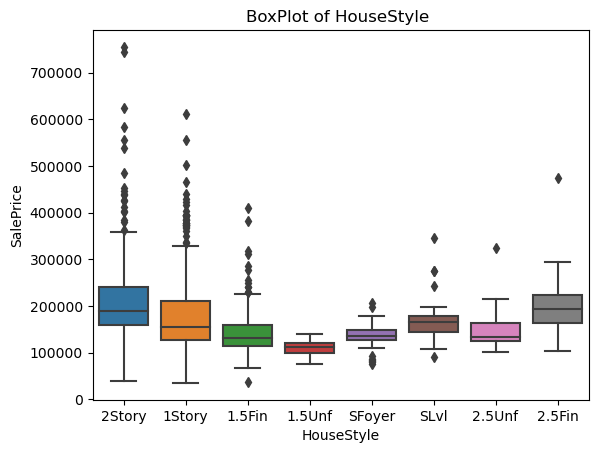

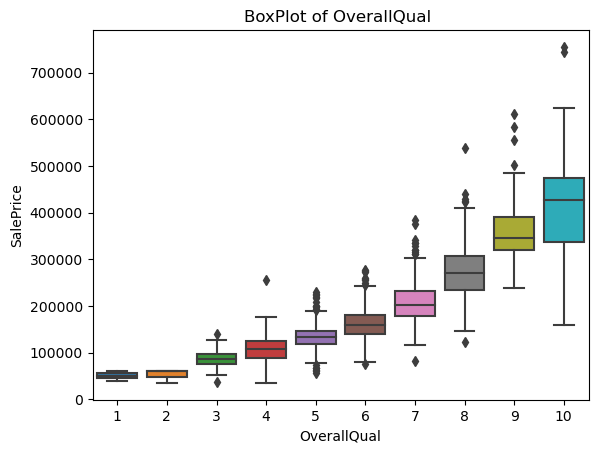

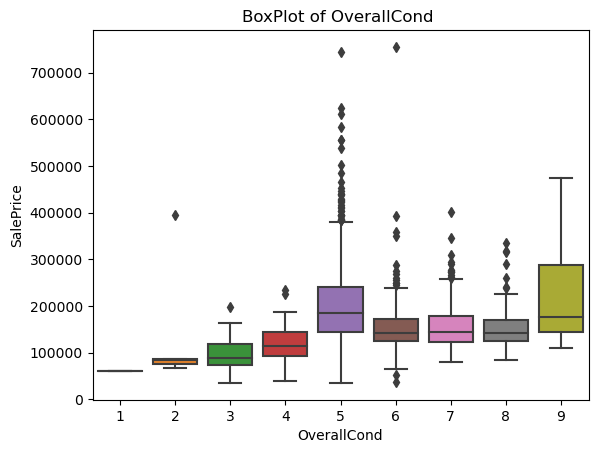

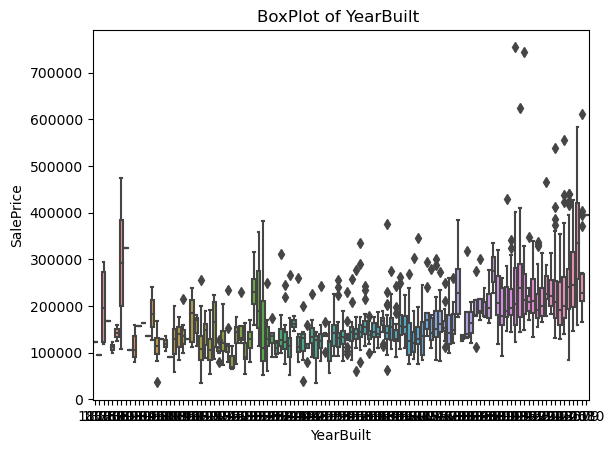

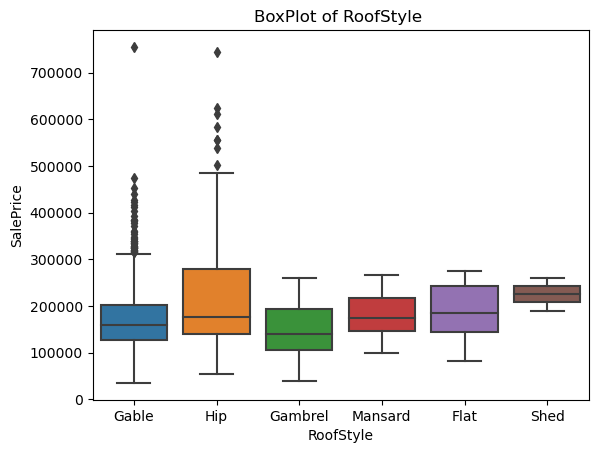

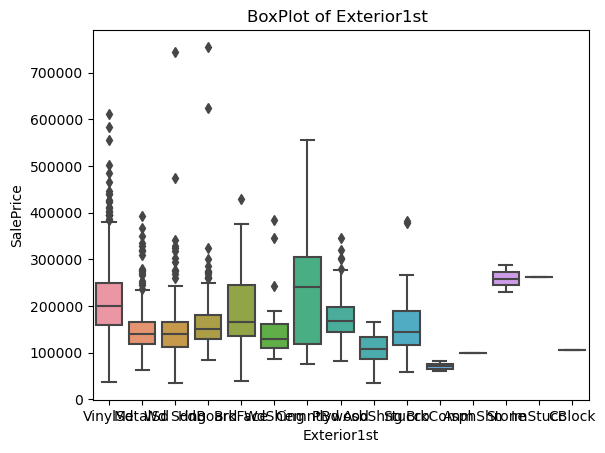

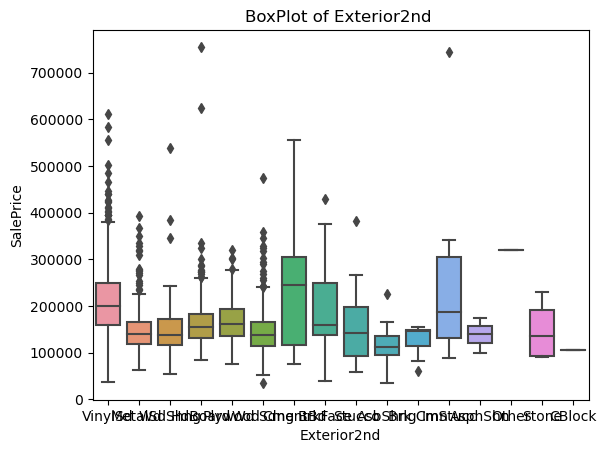

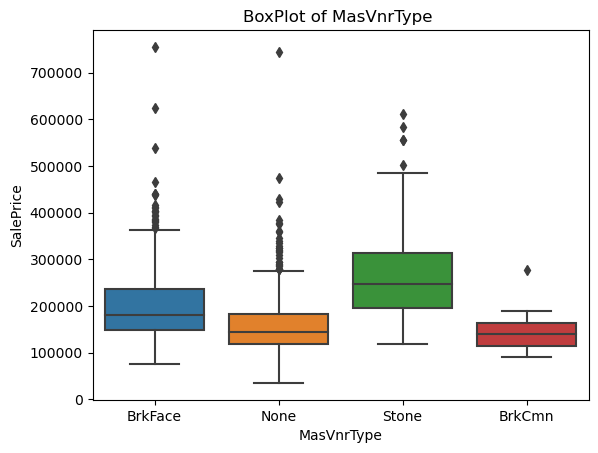

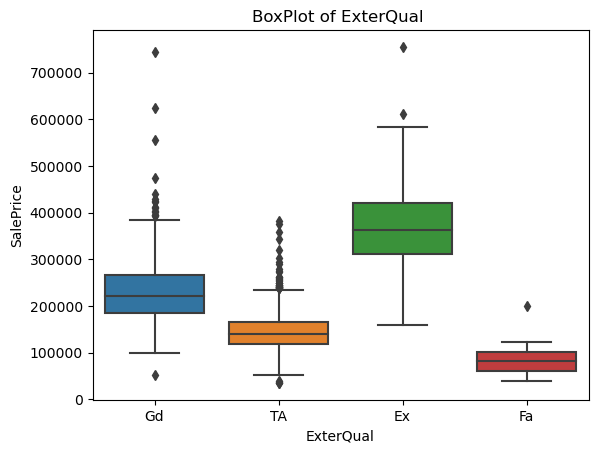

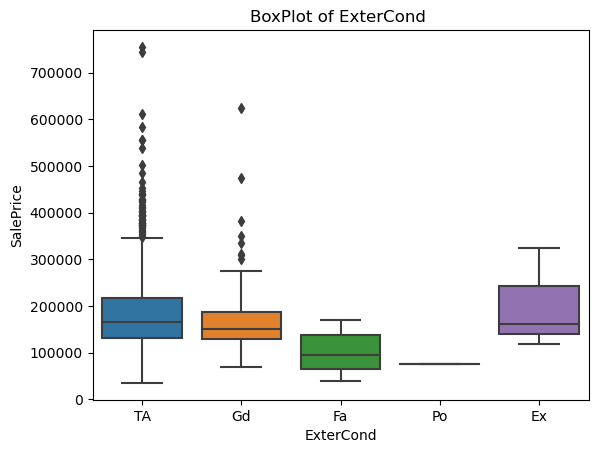

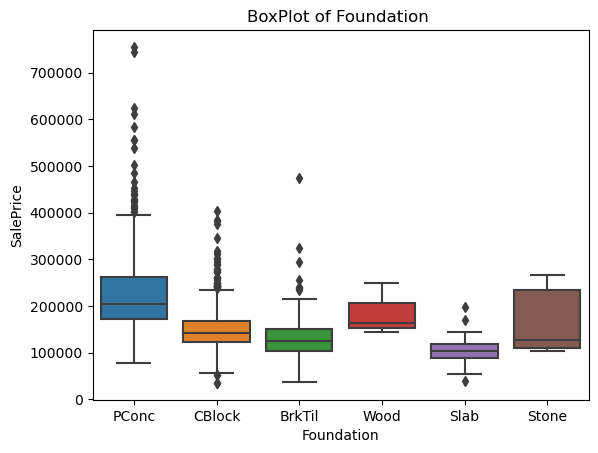

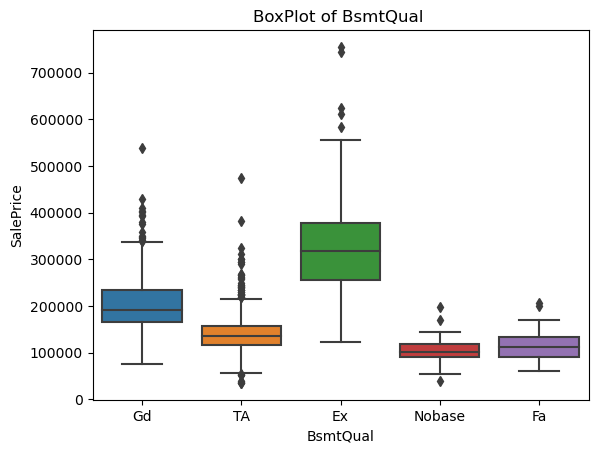

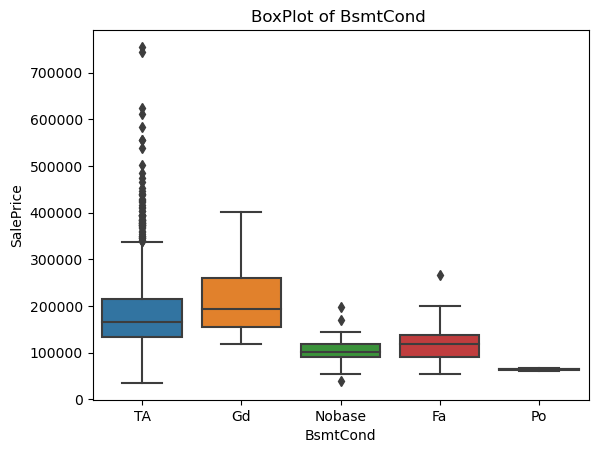

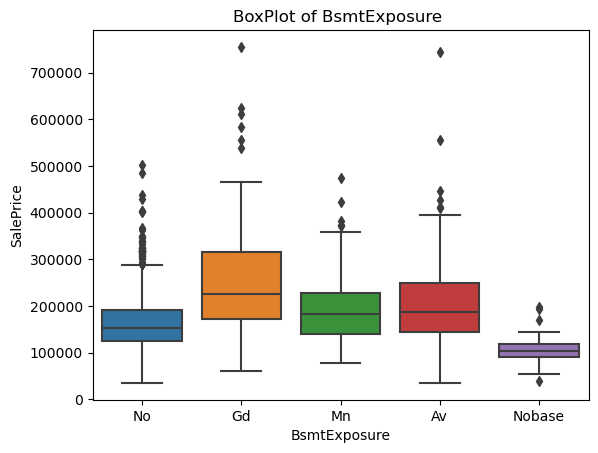

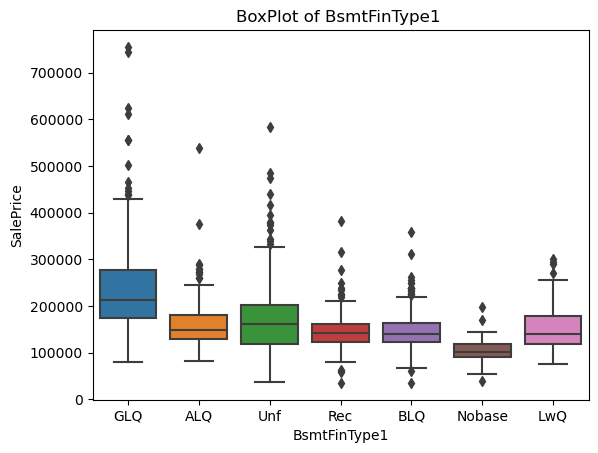

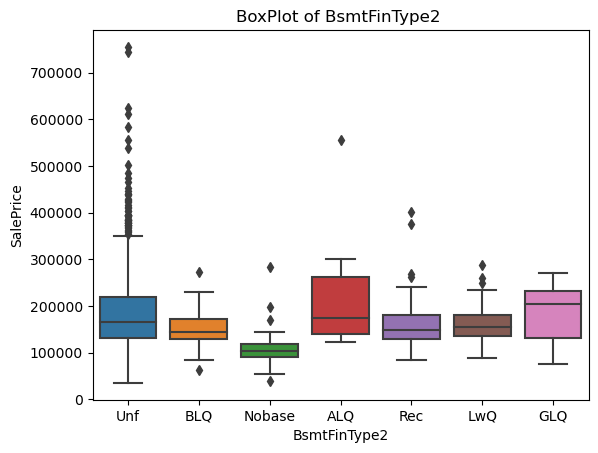

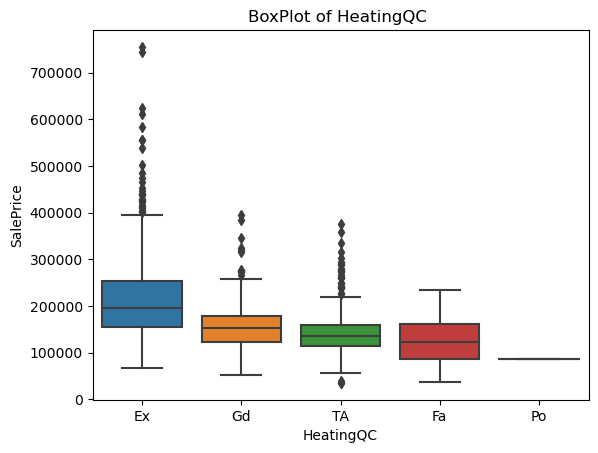

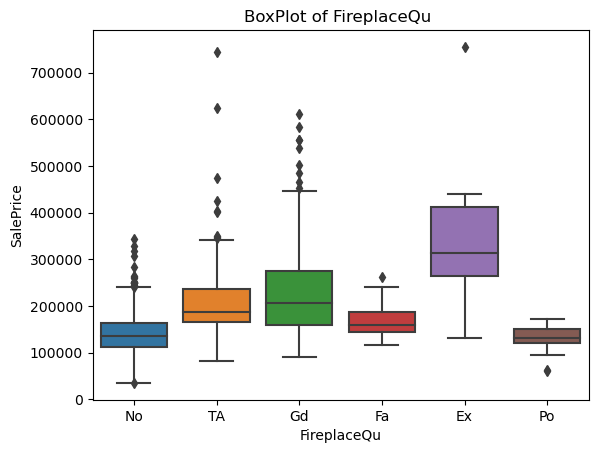

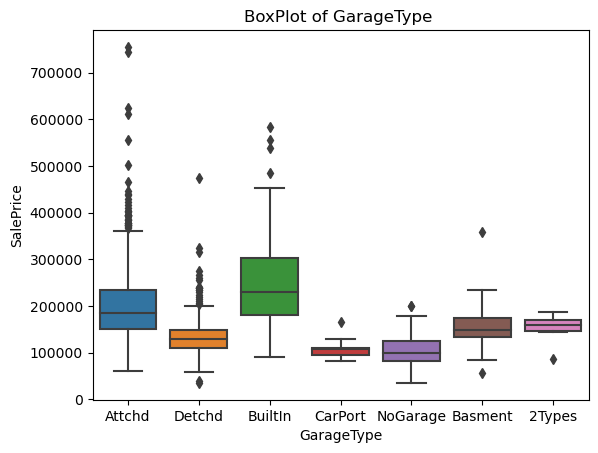

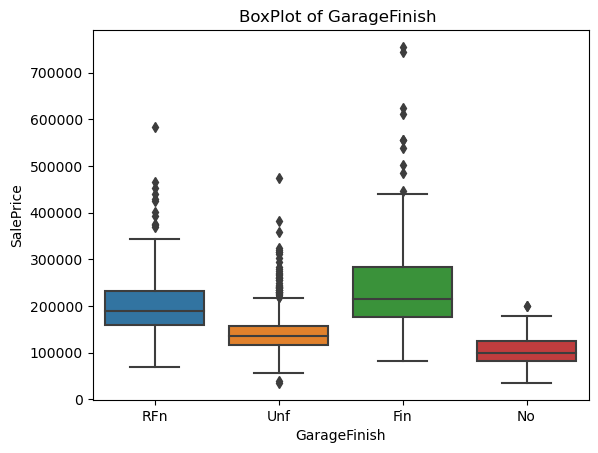

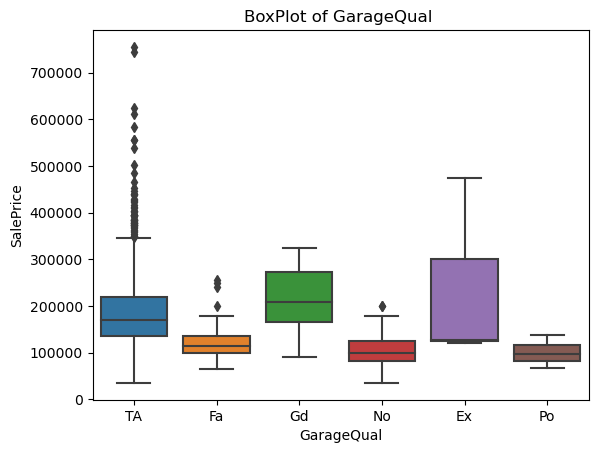

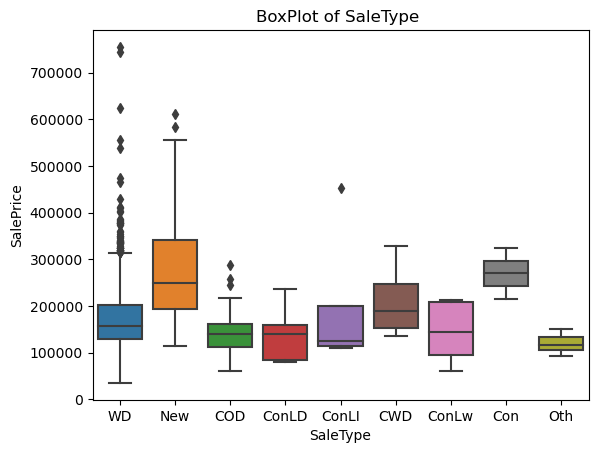

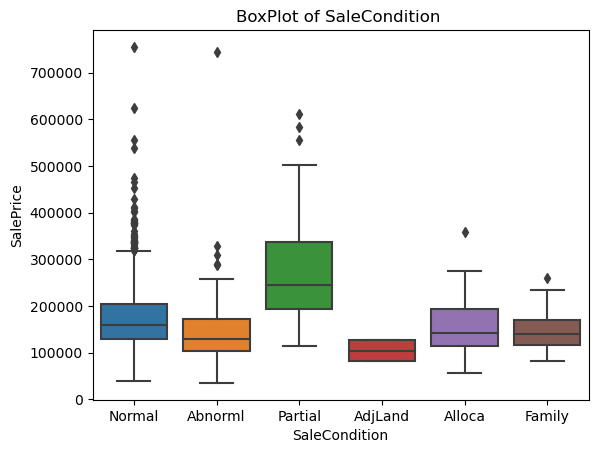

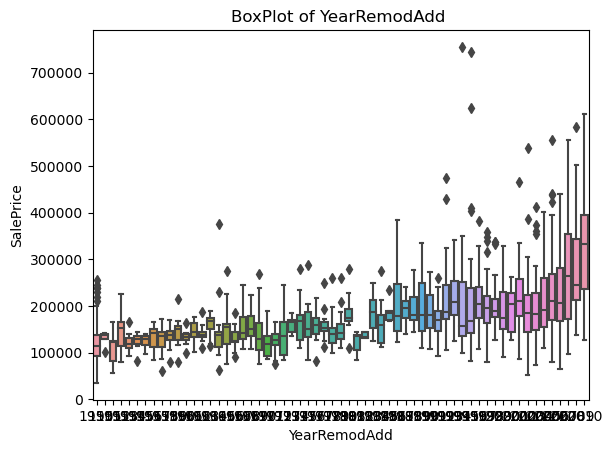

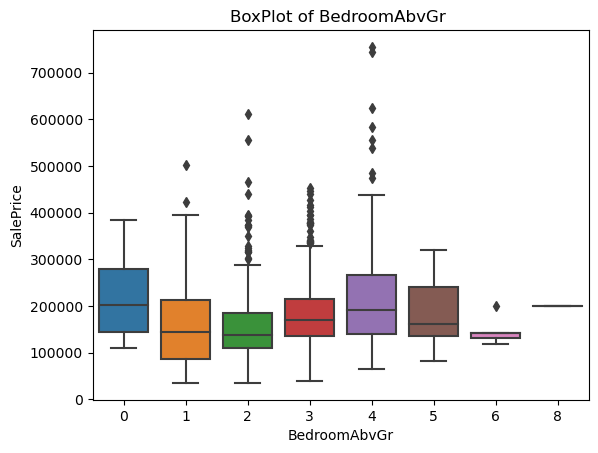

In [1381]:
plt.figure(figsize=(15,10))
for i,columns in enumerate(categorical):
    #plt.subplot(len(numerical)-1,1,i+1) 
    sns.boxplot(x=columns, y='SalePrice', data=housing)
    plt.title("BoxPlot of {} ".format(columns))
    plt.show()

# There is a increase in sales price when overallQual is more
# The saleprice of Stone type MasVnrType is having considerably more salesprice
# The ExterQual of Excellant has a considerably high salesprice
# The BsmtQual of Excellant has a considerably high slaesprice

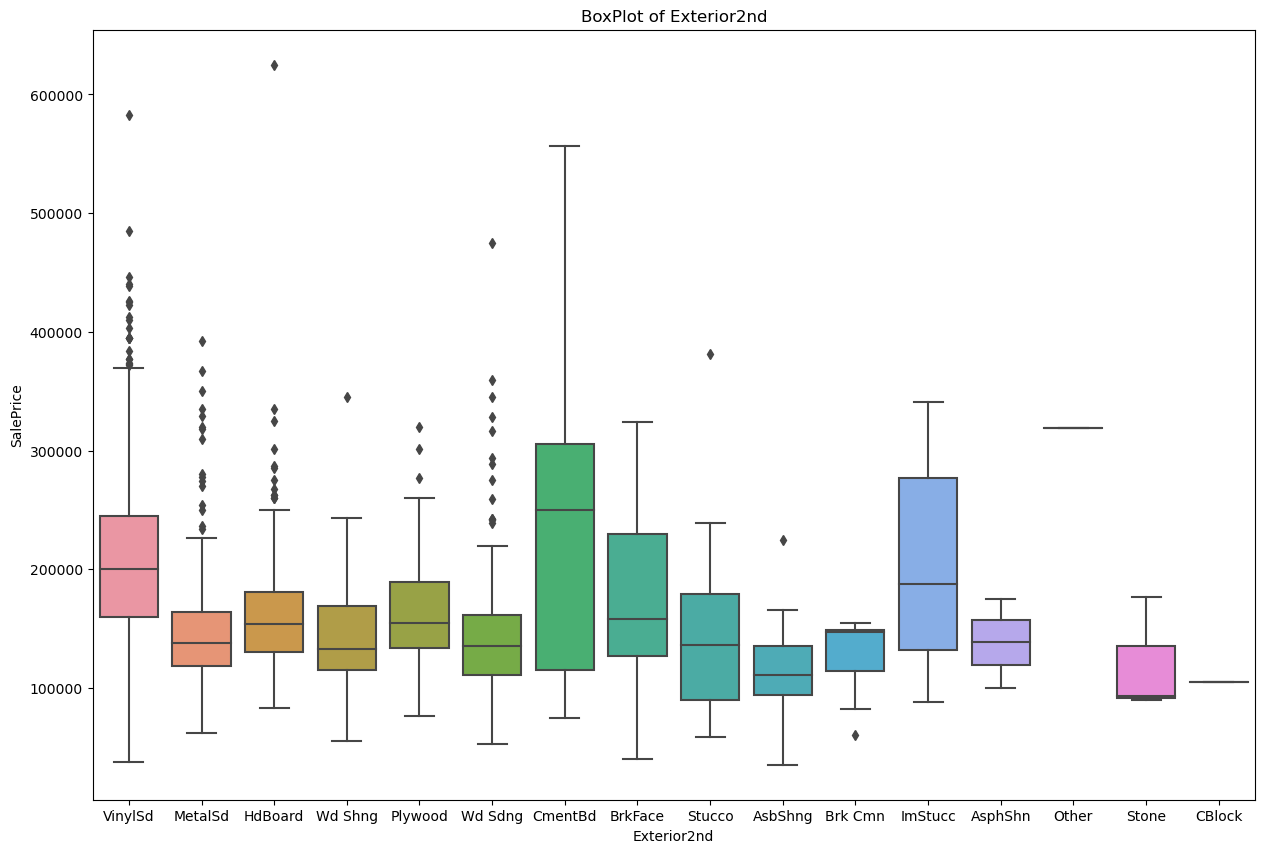

In [1383]:
plt.figure(figsize=(15,10))
#plt.subplot(len(numerical)-1,1,i+1) 
sns.boxplot(x='Exterior2nd', y='SalePrice', data=housing)
plt.title("BoxPlot of Exterior2nd")
plt.show()

# The CmentBd Exterior2nd has considerably high sales price

In [1450]:
plt.figure(figsize=(35,10))
#plt.subplot(len(numerical)-1,1,i+1) 
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=housing)
plt.title("BoxPlot of Exterior2nd")
plt.show()

ValueError: Could not interpret input 'YearRemodAdd'

<Figure size 3500x1000 with 0 Axes>

<AxesSubplot: >

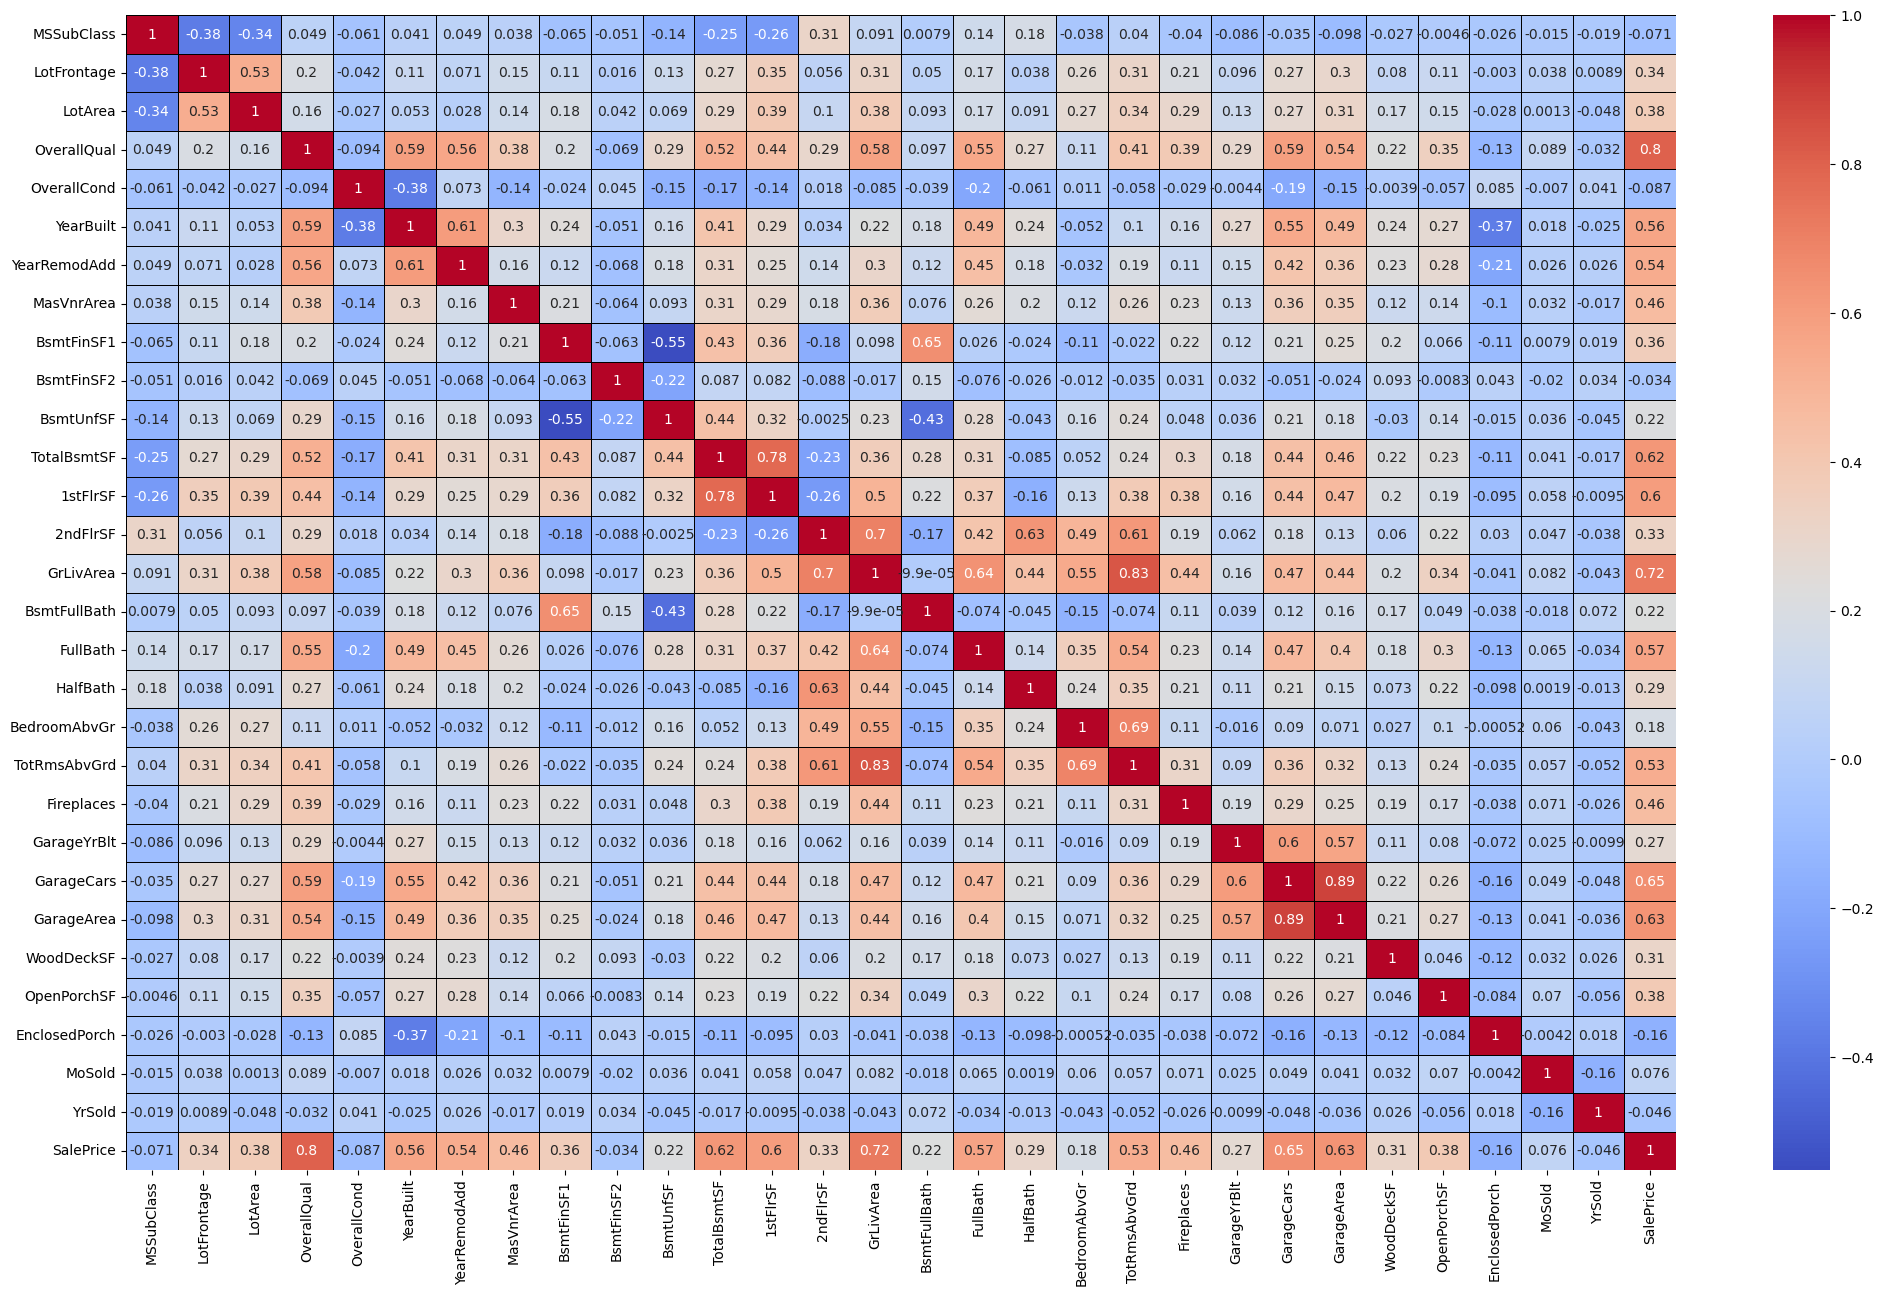

In [1385]:
# Plotting the heatmap to analyse the correlation of each varaible
plt.figure(figsize=(25,15))
sns.heatmap(data=housing.corr(), annot = True, cmap="coolwarm", linecolor = "black", linewidth=.5)

# The variable GarageCars is having 0.89 correlationg with GarageArea
# The variable GrLivArea and TotRmsAbvGrd is highly correlated (0.83)
# The variable OverallQual is highly correlated with sale Price

In [1386]:
housing = housing.drop(columns = ['GarageCars','GrLivArea'])

In [1387]:
#plotting pairplot among numerical variables
#sns.pairplot(housing[numerical])

In [1388]:
# Create a new column named IsRemodelled - This column can determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(checkRemodel, axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
4      NoRidge       Norm     1Fam  ...         TA         192           84   
5      Mitchel       Norm     1Fam  ...         TA          40           30   

   EnclosedPorch  MoSold YrSold SaleType SaleCondition SalePrice  IsRemodelled  
0              0       2   2008       WD        Normal    208500             0  
1              0       5   2007       WD        Normal    181500             0  
2              0       9   2008       WD        Normal    223500             1  
4              0      12   2008       WD        Normal    250000             0  
5              0      10   2009       WD        Normal    143000             1  

[5 rows x 57 columns]

In [1389]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def BuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(BuiltOrRemodelAge, axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...          0           61   
1      Veenker      Feedr     1Fam  ...        298            0   
2      CollgCr       Norm     1Fam  ...          0           42   
4      NoRidge       Norm     1Fam  ...        192           84   
5      Mitchel       Norm     1Fam  ...         40           30   

   EnclosedPorch  MoSold  YrSold SaleType SaleCondition SalePrice  \
0              0       2    2008       WD        Normal    208500   
1              0       5    2007       WD        Normal    181500   
2              0       9    2008       WD        Normal    223500   
4              0      12    2008       WD        Normal    250000   
5              0      10    2009       WD        Normal    143000   

  IsRemodelled  BuiltOrRemodelAge  
0            0                  5  
1            0                 31  
2            1                  6  
4            0                  8  
5            1                 14  

[5 rows x 58 columns]

In [1390]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def GarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(GarageConstructionPeriod)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... OpenPorchSF  EnclosedPorch  MoSold  \
0      CollgCr       Norm     1Fam  ...          61              0       2   
1      Veenker      Feedr     1Fam  ...           0              0       5   
2      CollgCr       Norm     1Fam  ...          42              0       9   
4      NoRidge       Norm     1Fam  ...          84              0      12   
5      Mitchel       Norm     1Fam  ...          30              0      10   

   YrSold  SaleType SaleCondition SalePrice IsRemodelled BuiltOrRemodelAge  \
0    2008        WD        Normal    208500            0                 5   
1    2007        WD        Normal    181500            0                31   
2    2008        WD        Normal    223500            1                 6   
4    2008        WD        Normal    250000            0                 8   
5    2009        WD        Normal    143000            1                14   

   OldOrNewGarage  
0               1  
1               0  
2               1  
4               1  
5               0  

[5 rows x 59 columns]

In [1391]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns

housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [1392]:
# updateing numerical and categorical variables
#noting the categorical and numerical variables from data dictionary
categorical = ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig',
              'Neighborhood','Condition1','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
              'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','FireplaceQu','GarageType','GarageFinish','GarageQual',
               'SaleType','SaleCondition','BedroomAbvGr','IsRemodelled','OldOrNewGarage','KitchenQual']
        
    

numerical = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageArea','TotRmsAbvGrd','WoodDeckSF','OpenPorchSF','EnclosedPorch','MoSold','BsmtFinSF2','SalePrice','BuiltOrRemodelAge']

In [1393]:
housing = pd.get_dummies(columns = categorical, data = housing,
                           drop_first=True)

In [1394]:
housing.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       ...
       'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_6',
       'BedroomAbvGr_8', 'IsRemodelled_1', 'OldOrNewGarage_1',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object', length=230)

# Spliting the dataset to test and train

In [1395]:
train, test = train_test_split(housing, train_size=0.7,test_size = 0.3, random_state=100)

In [1396]:
housing[numerical]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0            65.0     8450       196.0         706        150          856   
1            80.0     9600         0.0         978        284         1262   
2            68.0    11250       162.0         486        434          920   
4            84.0    14260       350.0         655        490         1145   
5            85.0    14115         0.0         732         64          796   
...           ...      ...         ...         ...        ...          ...   
1454         62.0     7500         0.0         410        811         1221   
1455         62.0     7917         0.0           0        953          953   
1456         85.0    13175       119.0         790        589         1542   
1457         66.0     9042         0.0         275        877         1152   
1458         68.0     9717         0.0          49          0         1078   

      1stFlrSF  2ndFlrSF  BsmtFullBath  FullBath  ...  Fireplaces  GarageArea  \
0          856       854             1         2  ...           0         548   
1         1262         0             0         2  ...           1         460   
2          920       866             1         2  ...           1         608   
4         1145      1053             1         2  ...           1         836   
5          796       566             1         1  ...           0         480   
...        ...       ...           ...       ...  ...         ...         ...   
1454      1221         0             1         2  ...           0         400   
1455       953       694             0         2  ...           1         460   
1456      2073         0             1         2  ...           2         500   
1457      1188      1152             0         2  ...           2         252   
1458      1078         0             1         1  ...           0         240   

      TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  \
0                8           0           61              0       2   
1                6         298            0              0       5   
2                6           0           42              0       9   
4                9         192           84              0      12   
5                5          40           30              0      10   
...            ...         ...          ...            ...     ...   
1454             6           0          113              0      10   
1455             7           0           40              0       8   
1456             7         349            0              0       2   
1457             9           0           60              0       5   
1458             5         366            0            112       4   

      BsmtFinSF2  SalePrice  BuiltOrRemodelAge  
0              0     208500                  5  
1              0     181500                 31  
2              0     223500                  6  
4              0     250000                  8  
5              0     143000                 14  
...          ...        ...                ...  
1454           0     185000                  4  
1455           0     175000                  7  
1456         163     210000                 22  
1457           0     266500                  4  
1458        1029     142125                 14  

[1378 rows x 21 columns]

In [1397]:
# initilasing minmaxscaler object.
Scaler = MinMaxScaler()
# fitting and transforming the train dataset.
train[numerical] = Scaler.fit_transform(train[numerical])
test[numerical] = Scaler.transform(test[numerical])

In [1398]:
train[numerical]

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
191      0.164384  0.170842     0.08625    0.369104   0.048387     0.343602   
109      0.287671  0.293067     0.30000    0.415684   0.556696     0.873934   
1297     0.047945  0.062384     0.05125    0.322524   0.000000     0.259242   
1332     0.157534  0.210974     0.00000    0.406840   0.061584     0.386730   
1387     0.133562  0.200777     0.00000    0.099057   0.000000     0.338389   
...           ...       ...         ...         ...        ...          ...   
849      0.202055  0.231626     0.22500    0.000000   0.258065     0.250237   
55       0.270548  0.248051     0.17000    0.288915   0.456989     0.675355   
368      0.195205  0.180211     0.12500    0.318396   0.355816     0.600948   
83       0.202055  0.211403     0.04125    0.000000   0.520528     0.504739   
838      0.184932  0.229484     0.00000    0.000000   0.537146     0.520853   

      1stFlrSF  2ndFlrSF  BsmtFullBath  FullBath  ...  Fireplaces  GarageArea  \
191   0.152496  0.414741      0.333333  0.333333  ...    0.000000    0.356932   
109   0.588924  0.000000      0.000000  0.666667  ...    0.333333    0.402655   
1297  0.287832  0.000000      0.333333  0.666667  ...    0.000000    0.387168   
1332  0.187988  0.000000      0.333333  0.333333  ...    0.333333    0.212389   
1387  0.518721  0.474147      0.000000  0.666667  ...    0.333333    0.159292   
...        ...       ...           ...       ...  ...         ...         ...   
849   0.296412  0.418592      0.000000  0.666667  ...    0.333333    0.377581   
55    0.425507  0.000000      0.000000  0.666667  ...    0.333333    0.424779   
368   0.364275  0.000000      0.000000  0.333333  ...    0.333333    0.179941   
83    0.285101  0.000000      0.000000  0.333333  ...    0.000000    0.339971   
838   0.298362  0.000000      0.000000  0.333333  ...    0.000000    0.259587   

      TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch    MoSold  \
191       0.416667    0.000000     0.121673            0.0  0.454545   
109       0.416667    0.000000     0.463878            0.0  0.000000   
1297      0.250000    0.000000     0.167300            0.0  0.454545   
1332      0.083333    0.000000     0.000000            0.0  0.363636   
1387      0.666667    0.184874     0.057034            0.0  0.636364   
...            ...         ...          ...            ...       ...   
849       0.416667    0.237395     0.380228            0.0  0.636364   
55        0.416667    0.000000     0.000000            0.0  0.545455   
368       0.416667    0.000000     0.372624            0.0  0.181818   
83        0.333333    0.155462     0.000000            0.0  0.545455   
838       0.333333    0.584034     0.000000            0.0  0.454545   

      BsmtFinSF2  SalePrice  BuiltOrRemodelAge  
191     0.000000   0.252148           0.050000  
109     0.000000   0.262323           0.550000  
1297    0.000000   0.177533           0.000000  
1332    0.000000   0.109700           0.850000  
1387    0.370421   0.170749           0.950000  
...          ...        ...                ...  
849     0.000000   0.257236           0.216667  
55      0.000000   0.246213           0.733333  
368     0.000000   0.163966           0.933333  
83      0.000000   0.154639           0.783333  
838     0.000000   0.184316           0.033333  

[964 rows x 21 columns]

In [1399]:
ytrain=train.pop('SalePrice')
xtrain=train
ytest=test.pop('SalePrice')
xtest=test

In [1400]:
# Declaring Linear regression object
lr = LinearRegression()
# Fitting xtrain and ytrain
lr.fit(xtrain,ytrain)
# running RFE on lr with number of features as 
rfe = RFE(lr,n_features_to_select = 50)
rfe = rfe.fit(xtrain,ytrain)

In [1401]:
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 53),
 ('TotRmsAbvGrd', False, 37),
 ('Fireplaces', False, 103),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 62),
 ('OpenPorchSF', False, 39),
 ('EnclosedPorch', False, 142),
 ('MoSold', False, 127),
 ('BuiltOrRemodelAge', True, 1),
 ('MSSubClass_30', False, 70),
 ('MSSubClass_40', False, 97),
 ('MSSubClass_45', False, 75),
 ('MSSubClass_50', False, 57),
 ('MSSubClass_60', False, 87),
 ('MSSubClass_70', False, 126),
 ('MSSubClass_75', False, 74),
 ('MSSubClass_80', False, 58),
 ('MSSubClass_85', False, 59),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 162),
 ('MSSubClass_160', False, 165),
 ('MSSubClass_180', False, 67),
 ('MSSubClass_190', True, 1),
 ('MSZoning_FV', True, 1)

In [1402]:
# Analysing the columns that RFE excluded
xtrain.columns[~(rfe.support_)] 

Index(['HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45',
       ...
       'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_6',
       'BedroomAbvGr_8', 'IsRemodelled_1', 'OldOrNewGarage_1',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object', length=179)

In [1403]:
#Creating a variable col to hold the list of columns suggested by RFE. 
col = xtrain.columns[rfe.support_]
print(col)
print(len(col))

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'GarageArea', 'BuiltOrRemodelAge', 'MSSubClass_90',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_9', 'Exterior1st_BrkComm', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'BsmtExposure_Gd', 'BsmtFinType1_Nobase', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NoGarage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'SaleType_Con',
       'SaleType_New', 'SaleCondition_Partial', 'BedroomAbv

In [1404]:
x_train_rfe = xtrain[col]

In [1405]:
# create a train dataframe with rfe suggested variables
x_train_rfe = xtrain[col]
# Adding a constant value since we are using statsmodels to train our model.
x_train_rfe = sm.add_constant(x_train_rfe)

In [1406]:
lm = sm.OLS(ytrain,x_train_rfe).fit() # Running the linear model

In [1407]:
# viewing the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        21:44:29   Log-Likelihood:                 1821.4
No. Observations:                 964   AIC:                            -3545.
Df Residuals:                     915   BIC:                            -3306.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

Text(0.5, 0, 'Errors')

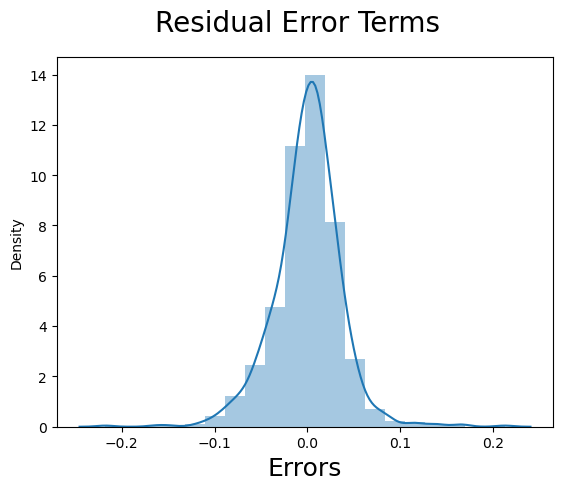

In [1409]:
y_LR_Pred = lm.predict(x_train_rfe)
res = ytrain-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

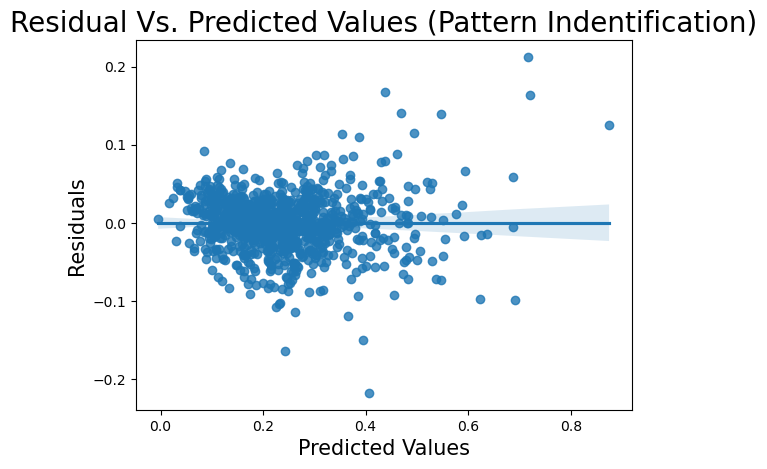

In [1410]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [1411]:
# Predicting on the test set
y_test_pred = lr.predict(xtest)

# Checking the r2_score
r2_score(ytest, y_test_pred)

-7.262588456740132e+17

In [1414]:
x_train_rfe.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'GarageArea', 'BuiltOrRemodelAge', 'MSSubClass_90',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_9', 'Exterior1st_BrkComm', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'BsmtExposure_Gd', 'BsmtFinType1_Nobase', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NoGarage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'SaleType_Con',
       'SaleType_New', 'SaleCondition_Partial', 'BedroomAbv

In [1413]:
x_train_rfe = x_train_rfe.drop(columns = ['const'], axis=1)

In [1414]:
x_train_rfe.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'GarageArea', 'BuiltOrRemodelAge', 'MSSubClass_90',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_9', 'Exterior1st_BrkComm', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'BsmtExposure_Gd', 'BsmtFinType1_Nobase', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NoGarage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'SaleType_Con',
       'SaleType_New', 'SaleCondition_Partial', 'BedroomAbv

# Ridge Regression

In [1415]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train_rfe, ytrain)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1416]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 2.0}


In [1417]:
#fit the data to ridge
ridge = Ridge(alpha=2)
ridge.fit(x_train_rfe, ytrain)
print(ridge.coef_)

[ 0.0406057   0.06130289  0.05327203  0.05969607  0.02786671  0.03102311
  0.09753239  0.11796647  0.15695616  0.03488372  0.04963666  0.07321881
 -0.04792253 -0.02642663 -0.03766024  0.04271864  0.02416836  0.02690018
  0.01324434  0.059871    0.04081063  0.03771186  0.07072903 -0.02642663
 -0.03184248  0.05250267  0.14071235  0.1432677   0.02969843 -0.03456905
  0.03462701 -0.00930261 -0.02023194  0.01885875  0.03477676  0.03493608
  0.02154928  0.00973906  0.03166693  0.00832571  0.01310017 -0.0102986
 -0.0290118  -0.01609755 -0.02272991 -0.02159505  0.0297666   0.04870954
 -0.01362914 -0.03470393]


In [1418]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=1000]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026484        -0.028228                1
12         1.0         -0.026285        -0.028236                2
11         0.9         -0.026264        -0.028248                3
10         0.8         -0.026243        -0.028264                4
9          0.7         -0.026220        -0.028282                5
8          0.6         -0.026197        -0.028306                6
7          0.5         -0.026174        -0.028339                7
14         3.0         -0.026695        -0.028360                8
6          0.4         -0.026151        -0.028380                9
5          0.3         -0.026127        -0.028439               10
15         4.0         -0.026929        -0.028512               11
4          0.2         -0.026100        -0.028532               12
16         5.0         -0.027187        -0.028691               13
3          0.1         -0.026069        -0.028707               14
17         6.0         -0.027448        -0.028891               15
2         0.01         -0.026041        -0.029010               16
1        0.001         -0.026039        -0.029057               17
0       0.0001         -0.026039        -0.029062               18
18         7.0         -0.027717        -0.029097               19
19         8.0         -0.027985        -0.029331               20
20         9.0         -0.028254        -0.029571               21
21        10.0         -0.028521        -0.029811               22
22          20         -0.031119        -0.032265               23
23          50         -0.037543        -0.038411               24
24         100         -0.044716        -0.045335               25
25         500         -0.065590        -0.065959               26
26        1000         -0.073780        -0.074068               27

In [1419]:
print(x_train_rfe.columns,x_train_rfe.shape)
print(col,col.shape)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'GarageArea', 'BuiltOrRemodelAge', 'MSSubClass_90',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_9', 'Exterior1st_BrkComm', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'BsmtExposure_Gd', 'BsmtFinType1_Nobase', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NoGarage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'SaleType_Con',
       'SaleType_New', 'SaleCondition_Partial', 'BedroomAbv

In [1420]:
# Predicting on the test set
y_test_pred = ridge.predict(xtest[col])

# Checking the r2_score
r2_score(ytest, y_test_pred)

0.9051370293812533

In [1421]:
y_train_pred = ridge.predict(xtrain[col])
r2_score(ytrain, y_train_pred)

0.9005617036773035

In [1422]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(xtrain[col])
y_pred_test = ridge.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9005617036773035
r2_test:
0.9051370293812533
RSS_train:
1.3615835768303957
RSS_test:
0.6487604313076661
MSE_train:
0.001412431096297091
MSE_test:
0.0015670541819025753


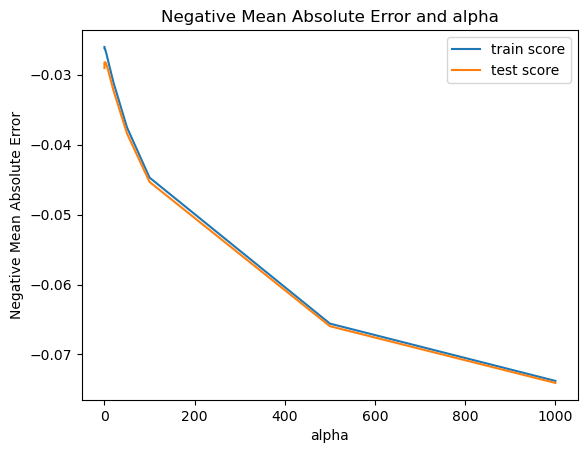

In [1423]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1424]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':xtrain[col].columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             LotFrontage       0.0406
1                 LotArea       0.0613
2              MasVnrArea       0.0533
3              BsmtFinSF1       0.0597
4              BsmtFinSF2       0.0279
5               BsmtUnfSF       0.0310
6             TotalBsmtSF       0.0975
7                1stFlrSF       0.1180
8                2ndFlrSF       0.1570
9            BsmtFullBath       0.0349
10               FullBath       0.0496
11             GarageArea       0.0732
12      BuiltOrRemodelAge      -0.0479
13          MSSubClass_90      -0.0264
14         MSSubClass_190      -0.0377
15            MSZoning_FV       0.0427
16            MSZoning_RH       0.0242
17            MSZoning_RL       0.0269
18            MSZoning_RM       0.0132
19   Neighborhood_Crawfor       0.0599
20   Neighborhood_NoRidge       0.0408
21   Neighborhood_NridgHt       0.0377
22   Neighborhood_StoneBr       0.0707
23        BldgType_Duplex      -0.0264
24      HouseStyle_2.5Unf      -0.0318
25          OverallQual_8       0.0525
26          OverallQual_9       0.1407
27         OverallQual_10       0.1433
28          OverallCond_9       0.0297
29    Exterior1st_BrkComm      -0.0346
30    Exterior2nd_BrkFace       0.0346
31     Exterior2nd_CBlock      -0.0093
32      Exterior2nd_Other      -0.0202
33      Exterior2nd_Stone       0.0189
34        BsmtExposure_Gd       0.0348
35    BsmtFinType1_Nobase       0.0349
36      GarageType_Attchd       0.0215
37     GarageType_Basment       0.0097
38     GarageType_BuiltIn       0.0317
39     GarageType_CarPort       0.0083
40      GarageType_Detchd       0.0131
41    GarageType_NoGarage      -0.0103
42          GarageQual_Fa      -0.0290
43          GarageQual_Gd      -0.0161
44          GarageQual_Po      -0.0227
45          GarageQual_TA      -0.0216
46           SaleType_Con       0.0298
47           SaleType_New       0.0487
48  SaleCondition_Partial      -0.0136
49         BedroomAbvGr_5      -0.0347

In [1425]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = xtrain[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
9           BsmtFullBath  0.156956
28         OverallCond_9  0.143268
27        OverallQual_10  0.140712
8               2ndFlrSF  0.117966
7               1stFlrSF  0.097532
12     BuiltOrRemodelAge  0.073219
23       BldgType_Duplex  0.070729
2             MasVnrArea  0.061303
20  Neighborhood_NoRidge  0.059871
4             BsmtFinSF2  0.059696

# Lasso Regression


In [1426]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(xtrain[col], ytrain)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1427]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [1428]:
lasso = Lasso(alpha=0.0001)
lasso.fit(xtrain[col], ytrain)

Lasso(alpha=0.0001)

In [1429]:
print(lasso.coef_)
print('coefficients of lasso sorted:')
sor = np.sort(lasso.coef_)[::-1]
for i,j in enumerate(sor) :
    print(i,j)

[ 0.02606733  0.05219053  0.04110745  0.03298647  0.00019733 -0.
  0.12589554  0.14474868  0.16967908  0.03335071  0.03973345  0.071193
 -0.04791226 -0.04808863 -0.03697522  0.02974507  0.00409468  0.01522966
  0.          0.05852341  0.03652802  0.0318798   0.06778496 -0.00232485
 -0.03073244  0.05479896  0.1558614   0.19316403  0.02330289 -0.02085175
  0.03145698 -0.         -0.          0.          0.03361504  0.03230413
  0.01029403 -0.          0.01894094 -0.          0.00099649 -0.
 -0.00695709  0.         -0.          0.          0.01009402  0.03378366
 -0.         -0.03682094]
coefficients of lasso sorted:
0 0.19316403179386907
1 0.1696790845999811
2 0.15586139681839298
3 0.1447486770242315
4 0.12589554063386724
5 0.07119300448729465
6 0.06778495811997444
7 0.058523408610134345
8 0.05479895721537053
9 0.05219052868053231
10 0.04110744732668674
11 0.03973344651582034
12 0.036528019954365984
13 0.03378365628049093
14 0.03361504214507193
15 0.03335070860638113
16 0.032986474975991

In [1430]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = lasso.predict(xtrain[col])
y_pred_test = lasso.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.8996747529369062
r2_test:
0.903691488888516
RSS_train:
1.3737283701971628
RSS_test:
0.6586463695976441
MSE_train:
0.0014250294296651066
MSE_test:
0.0015909332598976911


In [1431]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005199      0.000400         0.002800        0.000400       0.0001   
1       0.005201      0.000401         0.003000        0.001549       0.0010   
2       0.005198      0.001470         0.003800        0.000981       0.0100   
3       0.004600      0.000490         0.002800        0.000400       0.1000   
4       0.004400      0.000801         0.002799        0.000400       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.029692          -0.028932          -0.029019   
1   {'alpha': 0.001}          -0.033436          -0.029528          -0.034493   
2    {'alpha': 0.01}          -0.069744          -0.068605          -0.075043   
3     {'alpha': 0.1}          -0.092348          -0.090366          -0.097180   
4     {'alpha': 0.2}          -0.092348          -0.090366          -0.097180   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.027173  ...        -0.028525        0.000907                1   
1          -0.028579  ...        -0.031675        0.002266                2   
2          -0.056116  ...        -0.067302        0.006210                3   
3          -0.075421  ...        -0.088382        0.007325                4   
4          -0.075421  ...        -0.088382        0.007325                4   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.026421           -0.026773           -0.026453   
1           -0.030169           -0.030390           -0.030469   
2           -0.066218           -0.066659           -0.065581   
3           -0.086646           -0.087376           -0.085942   
4           -0.086646           -0.087376           -0.085942   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.027463           -0.026760         -0.026774         0.000375  
1           -0.030858           -0.029856         -0.030349         0.000332  
2           -0.068919           -0.067624         -0.067000         0.001167  
3           -0.091923           -0.089270         -0.088231         0.002154  
4           -0.091923           -0.089270         -0.088231         0.002154  

[5 rows x 21 columns]

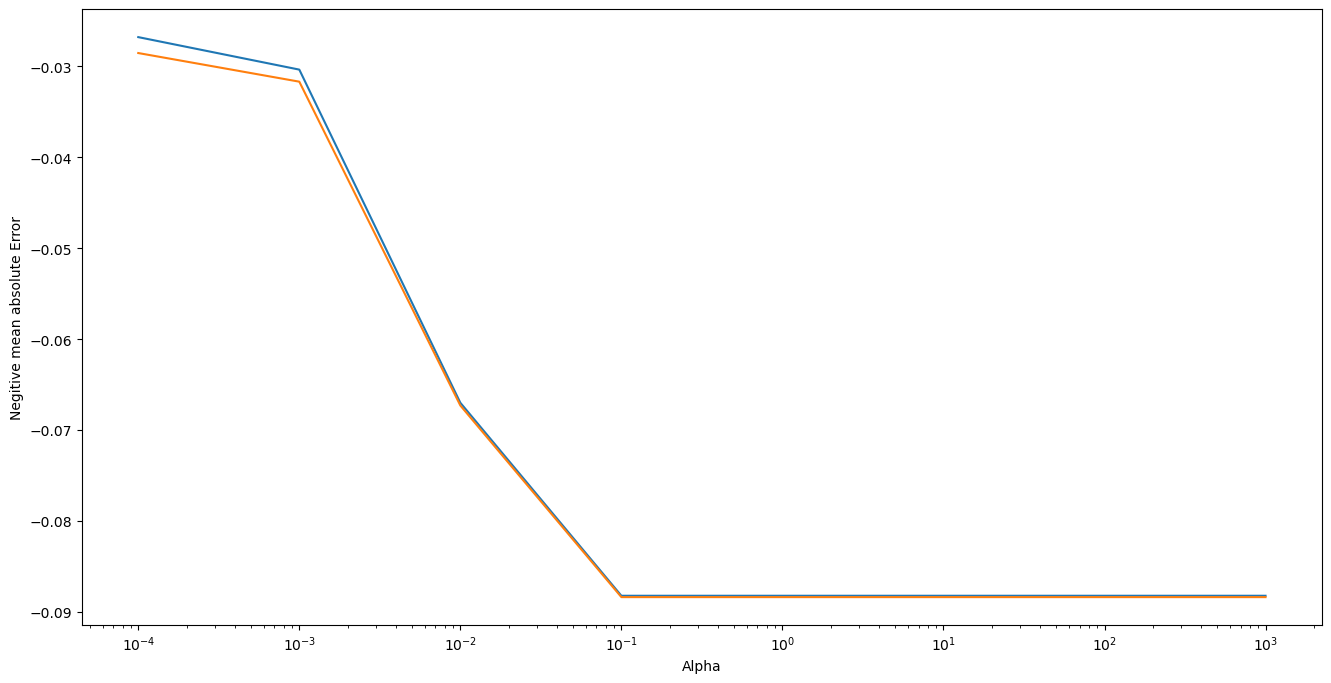

In [1432]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [1433]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
#cols = house_train.columns
col.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)



Featuere      Coef
28         OverallCond_9  0.193164
9           BsmtFullBath  0.169679
27        OverallQual_10  0.155861
8               2ndFlrSF  0.144749
7               1stFlrSF  0.125896
12     BuiltOrRemodelAge  0.071193
23       BldgType_Duplex  0.067785
20  Neighborhood_NoRidge  0.058523
26         OverallQual_9  0.054799
2             MasVnrArea  0.052191

In [1434]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':xtrain[col].columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            LotFrontage       0.0261
1                LotArea       0.0522
2             MasVnrArea       0.0411
3             BsmtFinSF1       0.0330
4             BsmtFinSF2       0.0002
5            TotalBsmtSF       0.1259
6               1stFlrSF       0.1447
7               2ndFlrSF       0.1697
8           BsmtFullBath       0.0334
9               FullBath       0.0397
10            GarageArea       0.0712
11     BuiltOrRemodelAge      -0.0479
12         MSSubClass_90      -0.0481
13        MSSubClass_190      -0.0370
14           MSZoning_FV       0.0297
15           MSZoning_RH       0.0041
16           MSZoning_RL       0.0152
17  Neighborhood_Crawfor       0.0585
18  Neighborhood_NoRidge       0.0365
19  Neighborhood_NridgHt       0.0319
20  Neighborhood_StoneBr       0.0678
21       BldgType_Duplex      -0.0023
22     HouseStyle_2.5Unf      -0.0307
23         OverallQual_8       0.0548
24         OverallQual_9       0.1559
25        OverallQual_10       0.1932
26         OverallCond_9       0.0233
27   Exterior1st_BrkComm      -0.0209
28   Exterior2nd_BrkFace       0.0315
29       BsmtExposure_Gd       0.0336
30   BsmtFinType1_Nobase       0.0323
31     GarageType_Attchd       0.0103
32    GarageType_BuiltIn       0.0189
33     GarageType_Detchd       0.0010
34         GarageQual_Fa      -0.0070
35          SaleType_Con       0.0101
36          SaleType_New       0.0338
37        BedroomAbvGr_5      -0.0368

# QUESTION 1 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

In [1276]:
#fit the data to ridge
ridge = Ridge(alpha=4)
ridge.fit(x_train_rfe, ytrain)
print(ridge.coef_)

[ 0.03498452  0.06079148  0.05417911  0.0593918   0.02509148  0.02929942
  0.0936777   0.10631996  0.14720484  0.03345155  0.0545765   0.0721511
 -0.04868323 -0.02443223 -0.03443476  0.0332648   0.01459807  0.01925707
  0.00437748  0.05746721  0.04120311  0.04014915  0.06356214 -0.02443223
 -0.02441404  0.05288851  0.12873582  0.11485483  0.03015999 -0.02250056
  0.03201765 -0.00528758 -0.01083846  0.01354021  0.03465351  0.02840381
  0.01606816  0.00386141  0.02652867  0.00158182  0.00614267 -0.01040841
 -0.01949206 -0.00785977 -0.01207611 -0.01325749  0.02059404  0.03714508
 -0.0003387  -0.02867982]


In [1443]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=1000]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026484        -0.028228                1
12         1.0         -0.026285        -0.028236                2
11         0.9         -0.026264        -0.028248                3
10         0.8         -0.026243        -0.028264                4
9          0.7         -0.026220        -0.028282                5
8          0.6         -0.026197        -0.028306                6
7          0.5         -0.026174        -0.028339                7
14         3.0         -0.026695        -0.028360                8
6          0.4         -0.026151        -0.028380                9
5          0.3         -0.026127        -0.028439               10
15         4.0         -0.026929        -0.028512               11
4          0.2         -0.026100        -0.028532               12
16         5.0         -0.027187        -0.028691               13
3          0.1         -0.026069        -0.028707               14
17         6.0         -0.027448        -0.028891               15
2         0.01         -0.026041        -0.029010               16
1        0.001         -0.026039        -0.029057               17
0       0.0001         -0.026039        -0.029062               18
18         7.0         -0.027717        -0.029097               19
19         8.0         -0.027985        -0.029331               20
20         9.0         -0.028254        -0.029571               21
21        10.0         -0.028521        -0.029811               22
22          20         -0.031119        -0.032265               23
23          50         -0.037543        -0.038411               24
24         100         -0.044716        -0.045335               25
25         500         -0.065590        -0.065959               26
26        1000         -0.073780        -0.074068               27

In [1444]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(xtrain[col])
y_pred_test = ridge.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9005617036773035
r2_test:
0.9051370293812533
RSS_train:
1.3615835768303957
RSS_test:
0.6487604313076661
MSE_train:
0.001412431096297091
MSE_test:
0.0015670541819025753


In [1445]:
y_train_pred = ridge.predict(xtrain[col])
r2_score(ytrain, y_train_pred)

0.9005617036773035

In [1446]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(xtrain[col])
y_pred_test = ridge.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9005617036773035
r2_test:
0.9051370293812533
RSS_train:
1.3615835768303957
RSS_test:
0.6487604313076661
MSE_train:
0.001412431096297091
MSE_test:
0.0015670541819025753


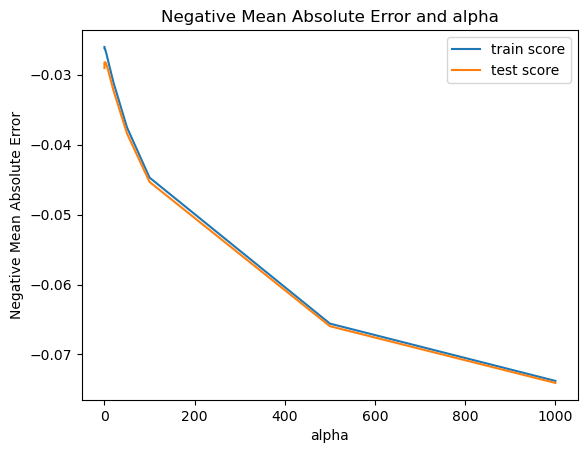

In [1447]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1448]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':xtrain[col].columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             LotFrontage       0.0406
1                 LotArea       0.0613
2              MasVnrArea       0.0533
3              BsmtFinSF1       0.0597
4              BsmtFinSF2       0.0279
5               BsmtUnfSF       0.0310
6             TotalBsmtSF       0.0975
7                1stFlrSF       0.1180
8                2ndFlrSF       0.1570
9            BsmtFullBath       0.0349
10               FullBath       0.0496
11             GarageArea       0.0732
12      BuiltOrRemodelAge      -0.0479
13          MSSubClass_90      -0.0264
14         MSSubClass_190      -0.0377
15            MSZoning_FV       0.0427
16            MSZoning_RH       0.0242
17            MSZoning_RL       0.0269
18            MSZoning_RM       0.0132
19   Neighborhood_Crawfor       0.0599
20   Neighborhood_NoRidge       0.0408
21   Neighborhood_NridgHt       0.0377
22   Neighborhood_StoneBr       0.0707
23        BldgType_Duplex      -0.0264
24      HouseStyle_2.5Unf      -0.0318
25          OverallQual_8       0.0525
26          OverallQual_9       0.1407
27         OverallQual_10       0.1433
28          OverallCond_9       0.0297
29    Exterior1st_BrkComm      -0.0346
30    Exterior2nd_BrkFace       0.0346
31     Exterior2nd_CBlock      -0.0093
32      Exterior2nd_Other      -0.0202
33      Exterior2nd_Stone       0.0189
34        BsmtExposure_Gd       0.0348
35    BsmtFinType1_Nobase       0.0349
36      GarageType_Attchd       0.0215
37     GarageType_Basment       0.0097
38     GarageType_BuiltIn       0.0317
39     GarageType_CarPort       0.0083
40      GarageType_Detchd       0.0131
41    GarageType_NoGarage      -0.0103
42          GarageQual_Fa      -0.0290
43          GarageQual_Gd      -0.0161
44          GarageQual_Po      -0.0227
45          GarageQual_TA      -0.0216
46           SaleType_Con       0.0298
47           SaleType_New       0.0487
48  SaleCondition_Partial      -0.0136
49         BedroomAbvGr_5      -0.0347

In [1449]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = xtrain[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
9           BsmtFullBath  0.156956
28         OverallCond_9  0.143268
27        OverallQual_10  0.140712
8               2ndFlrSF  0.117966
7               1stFlrSF  0.097532
12     BuiltOrRemodelAge  0.073219
23       BldgType_Duplex  0.070729
2             MasVnrArea  0.061303
20  Neighborhood_NoRidge  0.059871
4             BsmtFinSF2  0.059696

In [1435]:
# LASSO

In [1436]:
lasso = Lasso(alpha=0.0002)
lasso.fit(xtrain[col], ytrain)

Lasso(alpha=0.0002)

In [1437]:
print(lasso.coef_)
print('coefficients of lasso sorted:')
sor = np.sort(lasso.coef_)[::-1]
for i,j in enumerate(sor) :
    print(i,j)

[ 0.00354901  0.05257095  0.03635345  0.03519659  0.         -0.
  0.11845372  0.14784436  0.16767531  0.0283404   0.03836475  0.07507783
 -0.04897935 -0.04128691 -0.03296281  0.02690375  0.          0.01599764
 -0.          0.05497725  0.03352097  0.03065677  0.05904682 -0.00254746
 -0.01179853  0.05647578  0.15363167  0.18042902  0.01739416 -0.
  0.02487897 -0.         -0.          0.          0.03242083  0.0213386
  0.01090337 -0.          0.01803111 -0.         -0.         -0.
 -0.00472867  0.         -0.          0.          0.          0.03436504
  0.         -0.02869765]
coefficients of lasso sorted:
0 0.1804290155001363
1 0.16767530730917482
2 0.15363167340817047
3 0.14784436246568441
4 0.11845371999370147
5 0.07507783250882417
6 0.059046820613654814
7 0.056475777116471504
8 0.054977251811121425
9 0.05257095389103632
10 0.038364751898482895
11 0.03635344784066991
12 0.03519659167082656
13 0.03436504410983291
14 0.03352097266793623
15 0.03242082810178134
16 0.030656766241351732


In [1438]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = lasso.predict(xtrain[col])
y_pred_test = lasso.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.8963776768445642
r2_test:
0.9063803548664839
RSS_train:
1.4188744037165286
RSS_test:
0.6402574256270208
MSE_train:
0.0014718614146437018
MSE_test:
0.0015465155208382146


In [1439]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005199      0.000400         0.002800        0.000400       0.0001   
1       0.005201      0.000401         0.003000        0.001549       0.0010   
2       0.005198      0.001470         0.003800        0.000981       0.0100   
3       0.004600      0.000490         0.002800        0.000400       0.1000   
4       0.004400      0.000801         0.002799        0.000400       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.029692          -0.028932          -0.029019   
1   {'alpha': 0.001}          -0.033436          -0.029528          -0.034493   
2    {'alpha': 0.01}          -0.069744          -0.068605          -0.075043   
3     {'alpha': 0.1}          -0.092348          -0.090366          -0.097180   
4     {'alpha': 0.2}          -0.092348          -0.090366          -0.097180   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.027173  ...        -0.028525        0.000907                1   
1          -0.028579  ...        -0.031675        0.002266                2   
2          -0.056116  ...        -0.067302        0.006210                3   
3          -0.075421  ...        -0.088382        0.007325                4   
4          -0.075421  ...        -0.088382        0.007325                4   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.026421           -0.026773           -0.026453   
1           -0.030169           -0.030390           -0.030469   
2           -0.066218           -0.066659           -0.065581   
3           -0.086646           -0.087376           -0.085942   
4           -0.086646           -0.087376           -0.085942   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.027463           -0.026760         -0.026774         0.000375  
1           -0.030858           -0.029856         -0.030349         0.000332  
2           -0.068919           -0.067624         -0.067000         0.001167  
3           -0.091923           -0.089270         -0.088231         0.002154  
4           -0.091923           -0.089270         -0.088231         0.002154  

[5 rows x 21 columns]

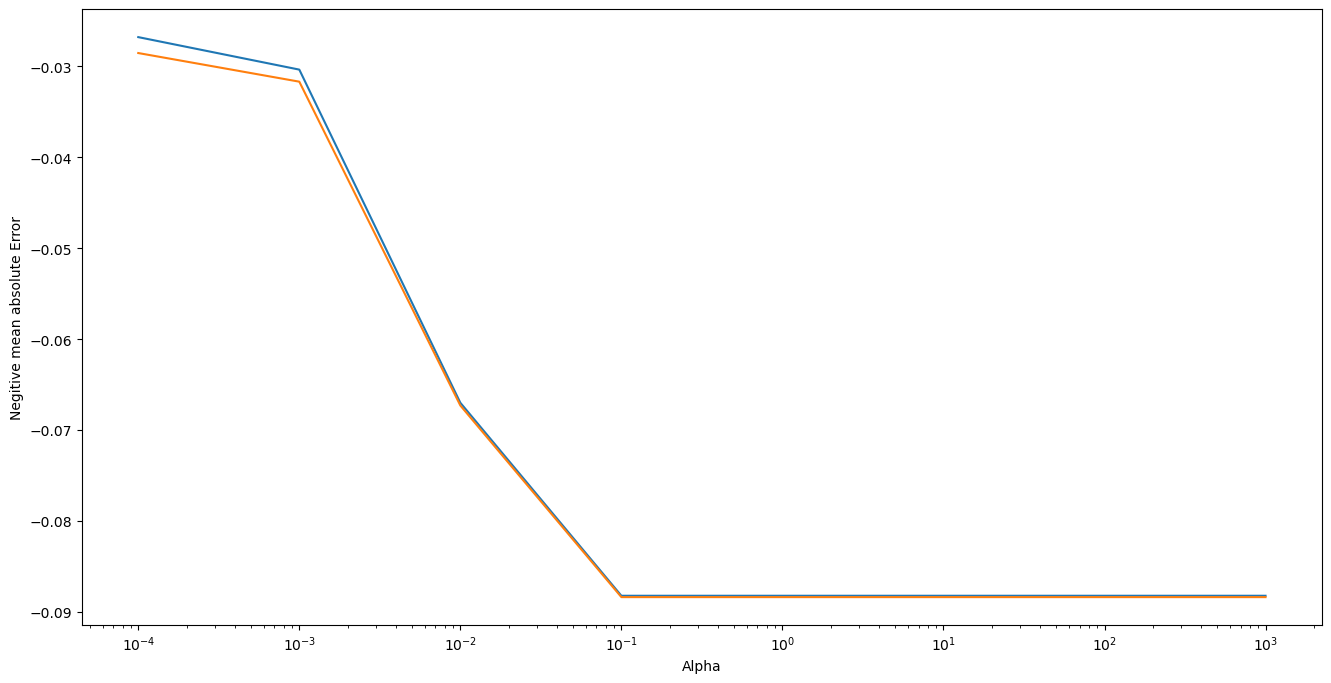

In [1440]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [1441]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
#cols = house_train.columns
col.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)



Featuere      Coef
28         OverallCond_9  0.180429
9           BsmtFullBath  0.167675
27        OverallQual_10  0.153632
8               2ndFlrSF  0.147844
7               1stFlrSF  0.118454
12     BuiltOrRemodelAge  0.075078
23       BldgType_Duplex  0.059047
26         OverallQual_9  0.056476
20  Neighborhood_NoRidge  0.054977
2             MasVnrArea  0.052571

In [1442]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':xtrain[col].columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            LotFrontage       0.0035
1                LotArea       0.0526
2             MasVnrArea       0.0364
3             BsmtFinSF1       0.0352
4            TotalBsmtSF       0.1185
5               1stFlrSF       0.1478
6               2ndFlrSF       0.1677
7           BsmtFullBath       0.0283
8               FullBath       0.0384
9             GarageArea       0.0751
10     BuiltOrRemodelAge      -0.0490
11         MSSubClass_90      -0.0413
12        MSSubClass_190      -0.0330
13           MSZoning_FV       0.0269
14           MSZoning_RL       0.0160
15  Neighborhood_Crawfor       0.0550
16  Neighborhood_NoRidge       0.0335
17  Neighborhood_NridgHt       0.0307
18  Neighborhood_StoneBr       0.0590
19       BldgType_Duplex      -0.0025
20     HouseStyle_2.5Unf      -0.0118
21         OverallQual_8       0.0565
22         OverallQual_9       0.1536
23        OverallQual_10       0.1804
24         OverallCond_9       0.0174
25   Exterior2nd_BrkFace       0.0249
26       BsmtExposure_Gd       0.0324
27   BsmtFinType1_Nobase       0.0213
28     GarageType_Attchd       0.0109
29    GarageType_BuiltIn       0.0180
30         GarageQual_Fa      -0.0047
31          SaleType_New       0.0344
32        BedroomAbvGr_5      -0.0287

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1331]:
x_train = xtrain[col]
x_train = x_train.drop(columns = ['OverallCond_9','BsmtFullBath','OverallQual_10','2ndFlrSF','1stFlrSF'])
col = col.drop( ['OverallCond_9','BsmtFullBath','OverallQual_10','2ndFlrSF','1stFlrSF'])
x_train.shape

(964, 45)

In [1332]:
#training a ridge model
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train, ytrain)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1333]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 3.0}


In [1334]:
#fit the data to ridge
ridge = Ridge(alpha=3)
ridge.fit(x_train, ytrain)
print(ridge.coef_)

[ 0.05485072  0.11578541  0.10277639  0.05195838  0.0319524   0.00800699
  0.07184907  0.12900706  0.10779278 -0.05584509 -0.02337624 -0.02590686
  0.03821658  0.03005771  0.01872062  0.01320027  0.08681801  0.07219076
  0.04167158  0.07882621 -0.02337624 -0.01249518  0.05565221  0.14145449
 -0.02749126  0.03705157  0.000401   -0.01693809  0.01010815  0.03274194
  0.00450886  0.0239926   0.0061737   0.0599951   0.00645345  0.01516549
 -0.01893865 -0.03045101 -0.02790564 -0.02039394 -0.03536548  0.03205781
  0.03998035 -0.01062962 -0.00127072]


In [1335]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=1000]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
14         3.0         -0.033881        -0.036050                1
13         2.0         -0.033639        -0.036060                2
15         4.0         -0.034110        -0.036132                3
12         1.0         -0.033386        -0.036162                4
11         0.9         -0.033364        -0.036185                5
10         0.8         -0.033340        -0.036210                6
9          0.7         -0.033317        -0.036238                7
16         5.0         -0.034348        -0.036255                8
8          0.6         -0.033294        -0.036272                9
7          0.5         -0.033269        -0.036321               10
17         6.0         -0.034589        -0.036390               11
6          0.4         -0.033245        -0.036395               12
5          0.3         -0.033219        -0.036505               13
18         7.0         -0.034832        -0.036533               14
4          0.2         -0.033195        -0.036664               15
19         8.0         -0.035077        -0.036704               16
20         9.0         -0.035327        -0.036897               17
3          0.1         -0.033165        -0.036912               18
21        10.0         -0.035579        -0.037092               19
2         0.01         -0.033142        -0.037291               20
1        0.001         -0.033140        -0.037343               21
0       0.0001         -0.033140        -0.037349               22
22          20         -0.037894        -0.039113               23
23          50         -0.043147        -0.043998               24
24         100         -0.048905        -0.049599               25
25         500         -0.066943        -0.067323               26
26        1000         -0.074546        -0.074839               27

In [1336]:
y_train_pred = ridge.predict(x_train)
r2_score(ytrain, y_train_pred)

0.8327691010655043

In [1337]:
# Predicting on the test set
y_test_pred = ridge.predict(xtest[col])

# Checking the r2_score
r2_score(ytest, y_test_pred)

0.8511064361726919

In [1338]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(xtrain[col])
y_pred_test = ridge.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.8327691010655043
r2_test:
0.8511064361726919
RSS_train:
2.289850630474061
RSS_test:
1.0182714293837507
MSE_train:
0.0023753637245581545
MSE_test:
0.0024595928245984317


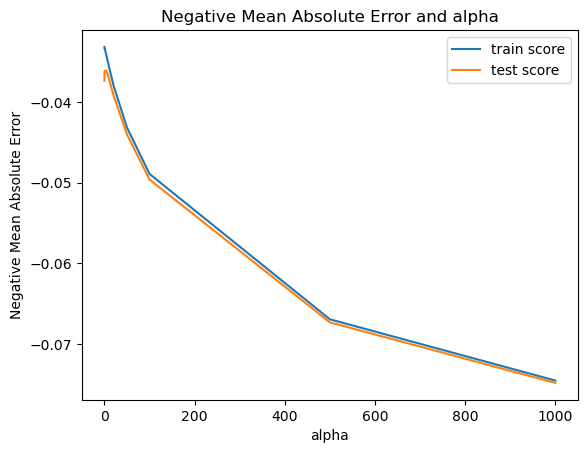

In [1339]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1340]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':xtrain[col].columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             LotFrontage       0.0549
1                 LotArea       0.1158
2              MasVnrArea       0.1028
3              BsmtFinSF1       0.0520
4              BsmtFinSF2       0.0320
5               BsmtUnfSF       0.0080
6             TotalBsmtSF       0.0718
7                FullBath       0.1290
8              GarageArea       0.1078
9       BuiltOrRemodelAge      -0.0558
10          MSSubClass_90      -0.0234
11         MSSubClass_190      -0.0259
12            MSZoning_FV       0.0382
13            MSZoning_RH       0.0301
14            MSZoning_RL       0.0187
15            MSZoning_RM       0.0132
16   Neighborhood_Crawfor       0.0868
17   Neighborhood_NoRidge       0.0722
18   Neighborhood_NridgHt       0.0417
19   Neighborhood_StoneBr       0.0788
20        BldgType_Duplex      -0.0234
21      HouseStyle_2.5Unf      -0.0125
22          OverallQual_8       0.0557
23          OverallQual_9       0.1415
24    Exterior1st_BrkComm      -0.0275
25    Exterior2nd_BrkFace       0.0371
26     Exterior2nd_CBlock       0.0004
27      Exterior2nd_Other      -0.0169
28      Exterior2nd_Stone       0.0101
29        BsmtExposure_Gd       0.0327
30    BsmtFinType1_Nobase       0.0045
31      GarageType_Attchd       0.0240
32     GarageType_Basment       0.0062
33     GarageType_BuiltIn       0.0600
34     GarageType_CarPort       0.0065
35      GarageType_Detchd       0.0152
36    GarageType_NoGarage      -0.0189
37          GarageQual_Fa      -0.0305
38          GarageQual_Gd      -0.0279
39          GarageQual_Po      -0.0204
40          GarageQual_TA      -0.0354
41           SaleType_Con       0.0321
42           SaleType_New       0.0400
43  SaleCondition_Partial      -0.0106
44         BedroomAbvGr_5      -0.0013

In [1341]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = xtrain[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
24   Exterior1st_BrkComm  0.141454
8             GarageArea  0.129007
2             MasVnrArea  0.115785
9      BuiltOrRemodelAge  0.107793
3             BsmtFinSF1  0.102776
17  Neighborhood_NoRidge  0.086818
20       BldgType_Duplex  0.078826
18  Neighborhood_NridgHt  0.072191
7               FullBath  0.071849
34    GarageType_CarPort  0.059995

In [ ]:
# Lasso regression


In [1345]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(xtrain[col], ytrain)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1346]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [1347]:
lasso = Lasso(alpha=0.0001)
lasso.fit(xtrain[col], ytrain)

Lasso(alpha=0.0001)

In [1348]:
print(lasso.coef_)
print('coefficients of lasso sorted:')
sor = np.sort(lasso.coef_)[::-1]
for i,j in enumerate(sor) :
    print(i,j)

[ 0.05410057  0.13381112  0.1210643   0.04467013  0.02878579 -0.
  0.07177337  0.13727926  0.11667312 -0.05493835 -0.04586296 -0.02841078
  0.02838213  0.01996801  0.00756585  0.00373624  0.09281953  0.07349179
  0.03731069  0.08887199 -0.00079412 -0.00357666  0.05513473  0.16016212
 -0.01717377  0.04014859  0.         -0.          0.          0.03082025
  0.          0.02112535  0.          0.05615391  0.          0.01351972
 -0.         -0.01334656 -0.01036562 -0.         -0.01966567  0.03400729
  0.02700225 -0.         -0.        ]
coefficients of lasso sorted:
0 0.16016211670882152
1 0.1372792563871688
2 0.13381111712002958
3 0.12106430134876142
4 0.11667311685872674
5 0.09281952620808326
6 0.08887198895022269
7 0.0734917869425913
8 0.0717733739196469
9 0.056153912502934486
10 0.05513473004617356
11 0.05410056712559853
12 0.04467013111441669
13 0.040148592132124614
14 0.03731069024800995
15 0.03400728658999719
16 0.03082025486579252
17 0.02878579370737851
18 0.02838212736294327
19 

In [1349]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = lasso.predict(xtrain[col])
y_pred_test = lasso.predict(xtest[col])

metric2=[]
r2_train_lr = r2_score(ytrain,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(ytest, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(ytrain-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(ytest - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(ytrain,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(ytest , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.8328900340692957
r2_test:
0.8451125819181894
RSS_train:
2.2881947252750727
RSS_test:
1.0592629295021103
MSE_train:
0.0023736459805758017
MSE_test:
0.002558606109908479


In [1350]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.007201      0.002726         0.001999        0.000894       0.0001   
1       0.005201      0.001603         0.002398        0.000489       0.0010   
2       0.003405      0.001366         0.001995        0.000632       0.0100   
3       0.003936      0.005938         0.000600        0.000799       0.1000   
4       0.003126      0.006252         0.000000        0.000000       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.035908          -0.035606          -0.039415   
1   {'alpha': 0.001}          -0.038889          -0.035032          -0.042124   
2    {'alpha': 0.01}          -0.069744          -0.068605          -0.075043   
3     {'alpha': 0.1}          -0.092348          -0.090366          -0.097180   
4     {'alpha': 0.2}          -0.092348          -0.090366          -0.097180   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.033669  ...        -0.036425        0.001933                1   
1          -0.033670  ...        -0.037585        0.002985                2   
2          -0.056116  ...        -0.067302        0.006210                3   
3          -0.075421  ...        -0.088382        0.007325                4   
4          -0.075421  ...        -0.088382        0.007325                4   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.033679           -0.033761           -0.032943   
1           -0.035752           -0.036114           -0.036425   
2           -0.066218           -0.066659           -0.065581   
3           -0.086646           -0.087376           -0.085942   
4           -0.086646           -0.087376           -0.085942   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.034623           -0.033351         -0.033672         0.000556  
1           -0.036725           -0.035947         -0.036193         0.000346  
2           -0.068919           -0.067624         -0.067000         0.001167  
3           -0.091923           -0.089270         -0.088231         0.002154  
4           -0.091923           -0.089270         -0.088231         0.002154  

[5 rows x 21 columns]

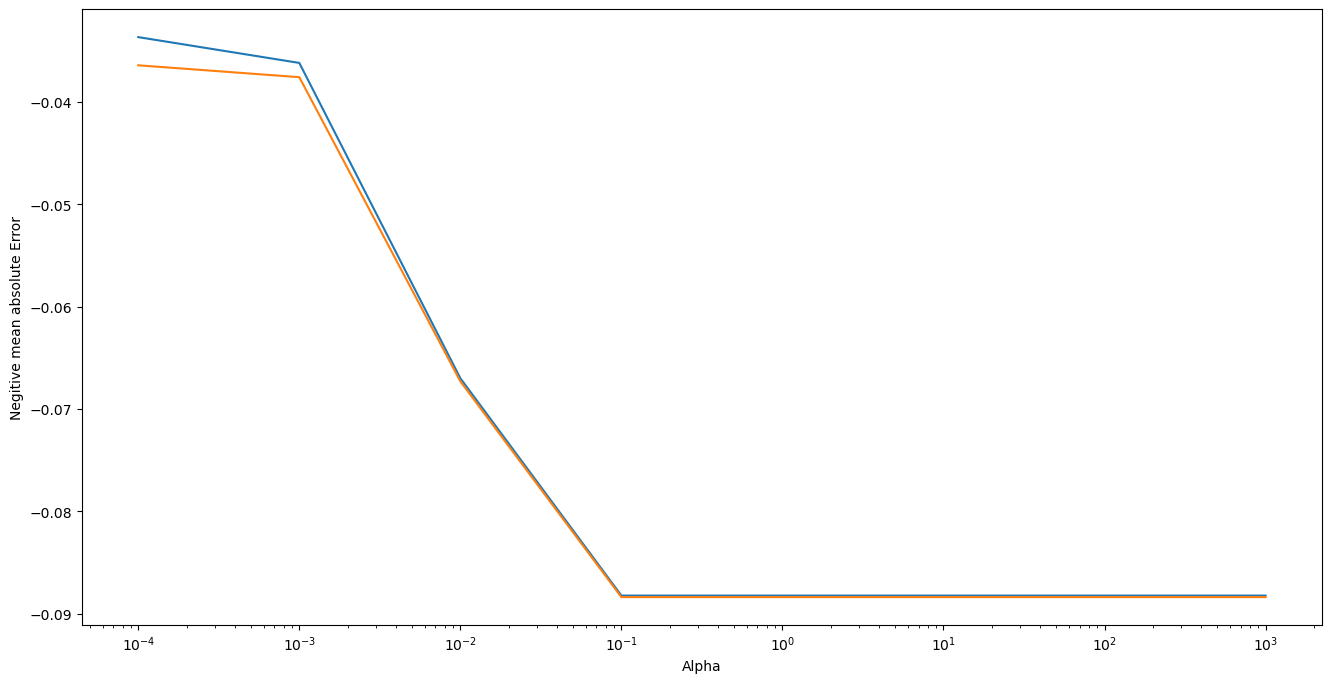

In [1351]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [1352]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
#cols = house_train.columns
col.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)



Featuere      Coef
24   Exterior1st_BrkComm  0.160162
8             GarageArea  0.137279
2             MasVnrArea  0.133811
3             BsmtFinSF1  0.121064
9      BuiltOrRemodelAge  0.116673
17  Neighborhood_NoRidge  0.092820
20       BldgType_Duplex  0.088872
18  Neighborhood_NridgHt  0.073492
7               FullBath  0.071773
34    GarageType_CarPort  0.056154

In [1275]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':xtrain[col].columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            LotFrontage       0.0261
1                LotArea       0.0522
2             MasVnrArea       0.0411
3             BsmtFinSF1       0.0330
4             BsmtFinSF2       0.0002
5            TotalBsmtSF       0.1259
6               1stFlrSF       0.1447
7               2ndFlrSF       0.1697
8           BsmtFullBath       0.0334
9               FullBath       0.0397
10            GarageArea       0.0712
11     BuiltOrRemodelAge      -0.0479
12         MSSubClass_90      -0.0481
13        MSSubClass_190      -0.0370
14           MSZoning_FV       0.0297
15           MSZoning_RH       0.0041
16           MSZoning_RL       0.0152
17  Neighborhood_Crawfor       0.0585
18  Neighborhood_NoRidge       0.0365
19  Neighborhood_NridgHt       0.0319
20  Neighborhood_StoneBr       0.0678
21       BldgType_Duplex      -0.0023
22     HouseStyle_2.5Unf      -0.0307
23         OverallQual_8       0.0548
24         OverallQual_9       0.1559
25        OverallQual_10       0.1932
26         OverallCond_9       0.0233
27   Exterior1st_BrkComm      -0.0209
28   Exterior2nd_BrkFace       0.0315
29       BsmtExposure_Gd       0.0336
30   BsmtFinType1_Nobase       0.0323
31     GarageType_Attchd       0.0103
32    GarageType_BuiltIn       0.0189
33     GarageType_Detchd       0.0010
34         GarageQual_Fa      -0.0070
35          SaleType_Con       0.0101
36          SaleType_New       0.0338
37        BedroomAbvGr_5      -0.0368